# Chapter -0 : Introduction

Neuron in human brain:  
 
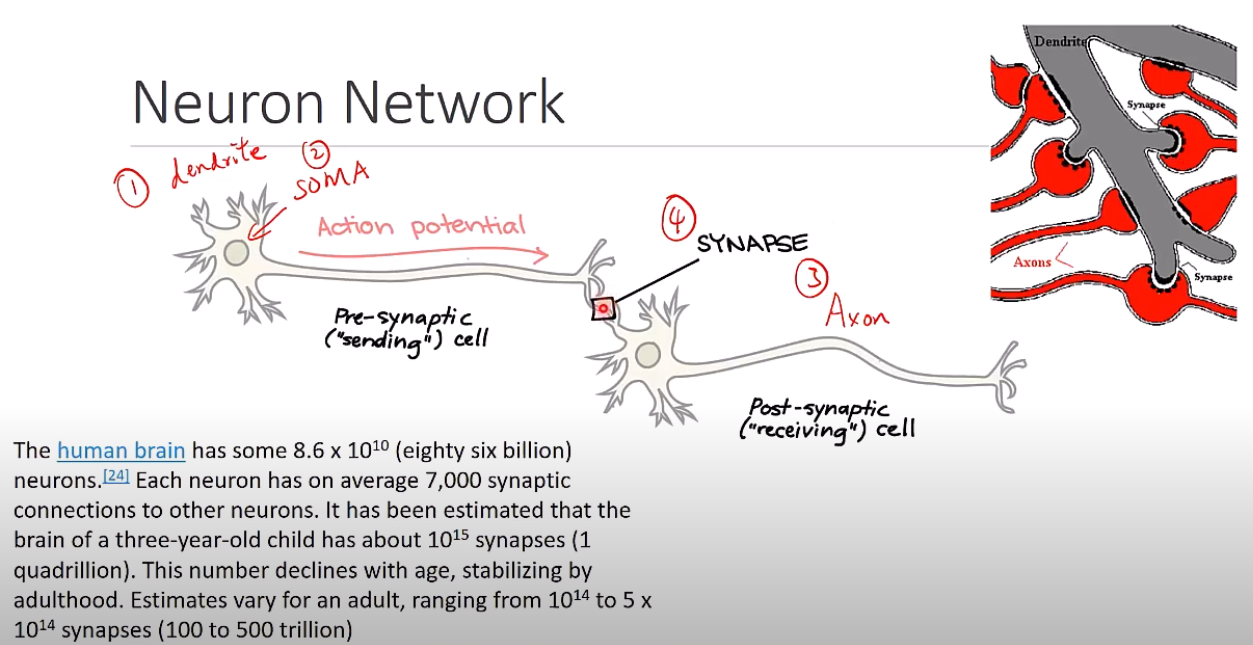

* Well, normally inside of our membrane is negatively charged potassium ion concentaration, and outer part is with Na+ cocnentration. So normally what we call as resting potential potentail will be -80 mV. Now when stimulus is there, it generally goes from left to right and causes deploarization or increase in potential: this is what we call as action potential: geneally this action potential is about 2 msec of width then it goes to refractory period where a neuron is completely off, it wont accept any stimuli. after that it would go to wait stage or we call as resting stage, we can think resting stage as sleepting stage.

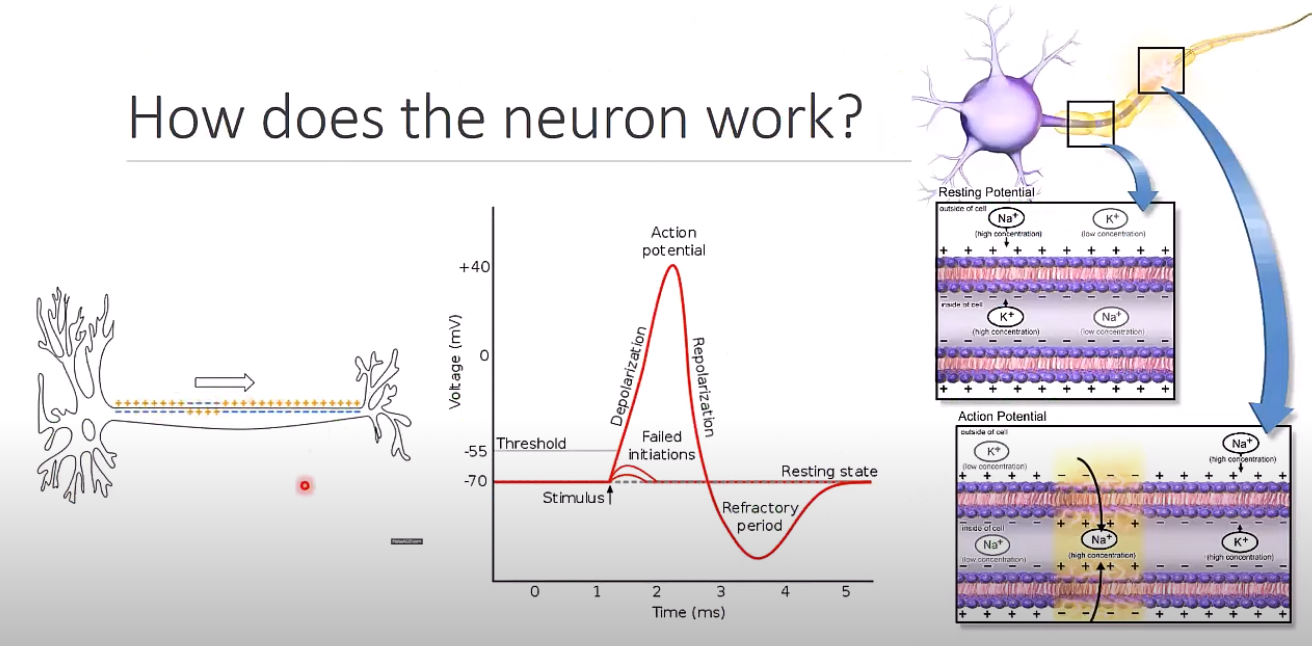

  

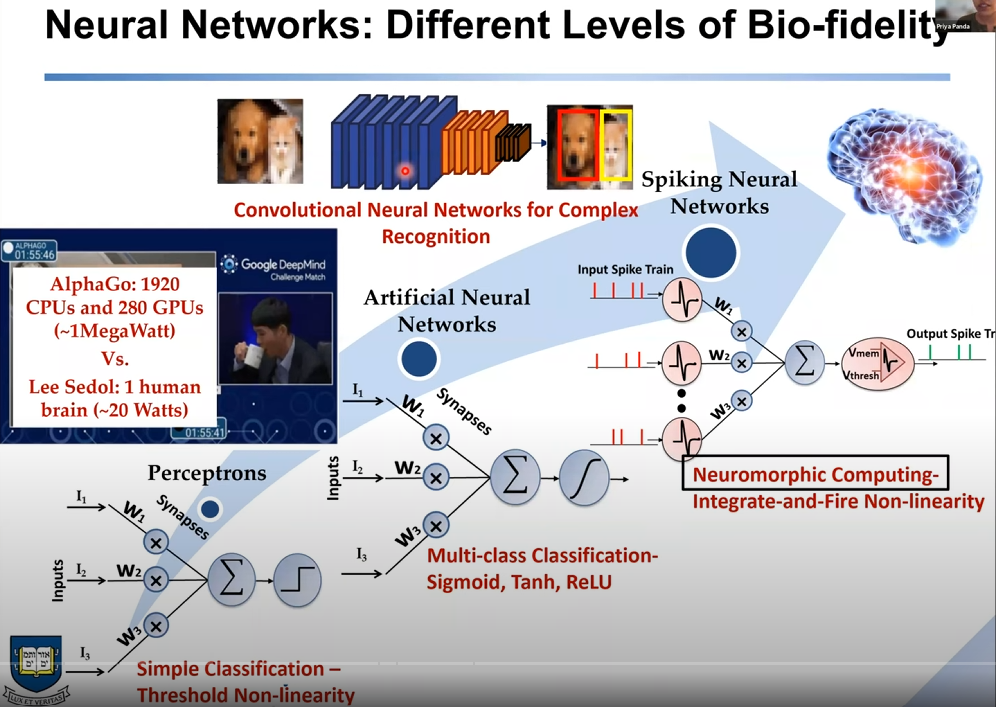

Can we take cues from human brain?
1. neuron model: discrete spiking? LIF? Stochastic neuron? what kind of neuron models?
2. Learning alogorithm? back propagation or can we add something?
3. netwrok topology: ANN doesnt have feedback connections? can we integrate long range connection through feedback ?
4. computing priciple: event driven? asynchronous?

what is the difference between ANN and SNN?

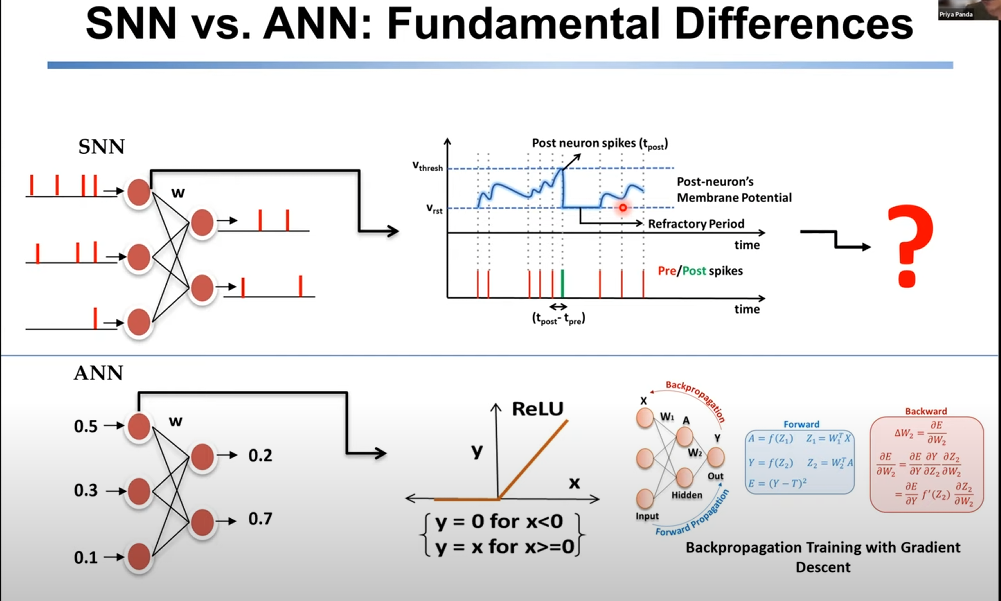

# Chapter-1 : Understanding Leaky and integrated First order neuron:

* Neurons communicate via spikes: In our brains, biological neurons (about 87 billion of them) are connected in complex networks. Biological neurons communicate with each other through spikes (also known as action potentials or nerve impulses). Spikes are short (about 2 milliseconds) electrical impulses that are transmitted between neurons through chemical signals.
  
* Pre-synaptic and post synaptic neuron: Many pre-synaptic neurons might connect to a single post-synapctic neuron. Post-synaptic neurons can also connect back to pre-synaptic neurons, forming loops.
  
* When does neuron fire? --> A simple set of low-level rules determine when neurons spike. In short, when the neuron’s potential energy (which it can build up through pre-synaptic neuron spikes) exceeds a threshold, a neuron spikes.
  
* LIF neuron model: All models are wrong but some are useful! ofcourse replicating biological chemical processes is very challenging, neuromorphic hardware simulates basic operations of our brain by capturing important aspects and functionalities. The name “leaky integrate-and-fire” reveals the fundamental properties of these neurons. The post-synaptic neuron adds up (integrates) the inputs from the connected pre-synaptic neurons but its value decreases (leaks) over time. If the sum of those inputs reaches a minimum threshold, it fires.


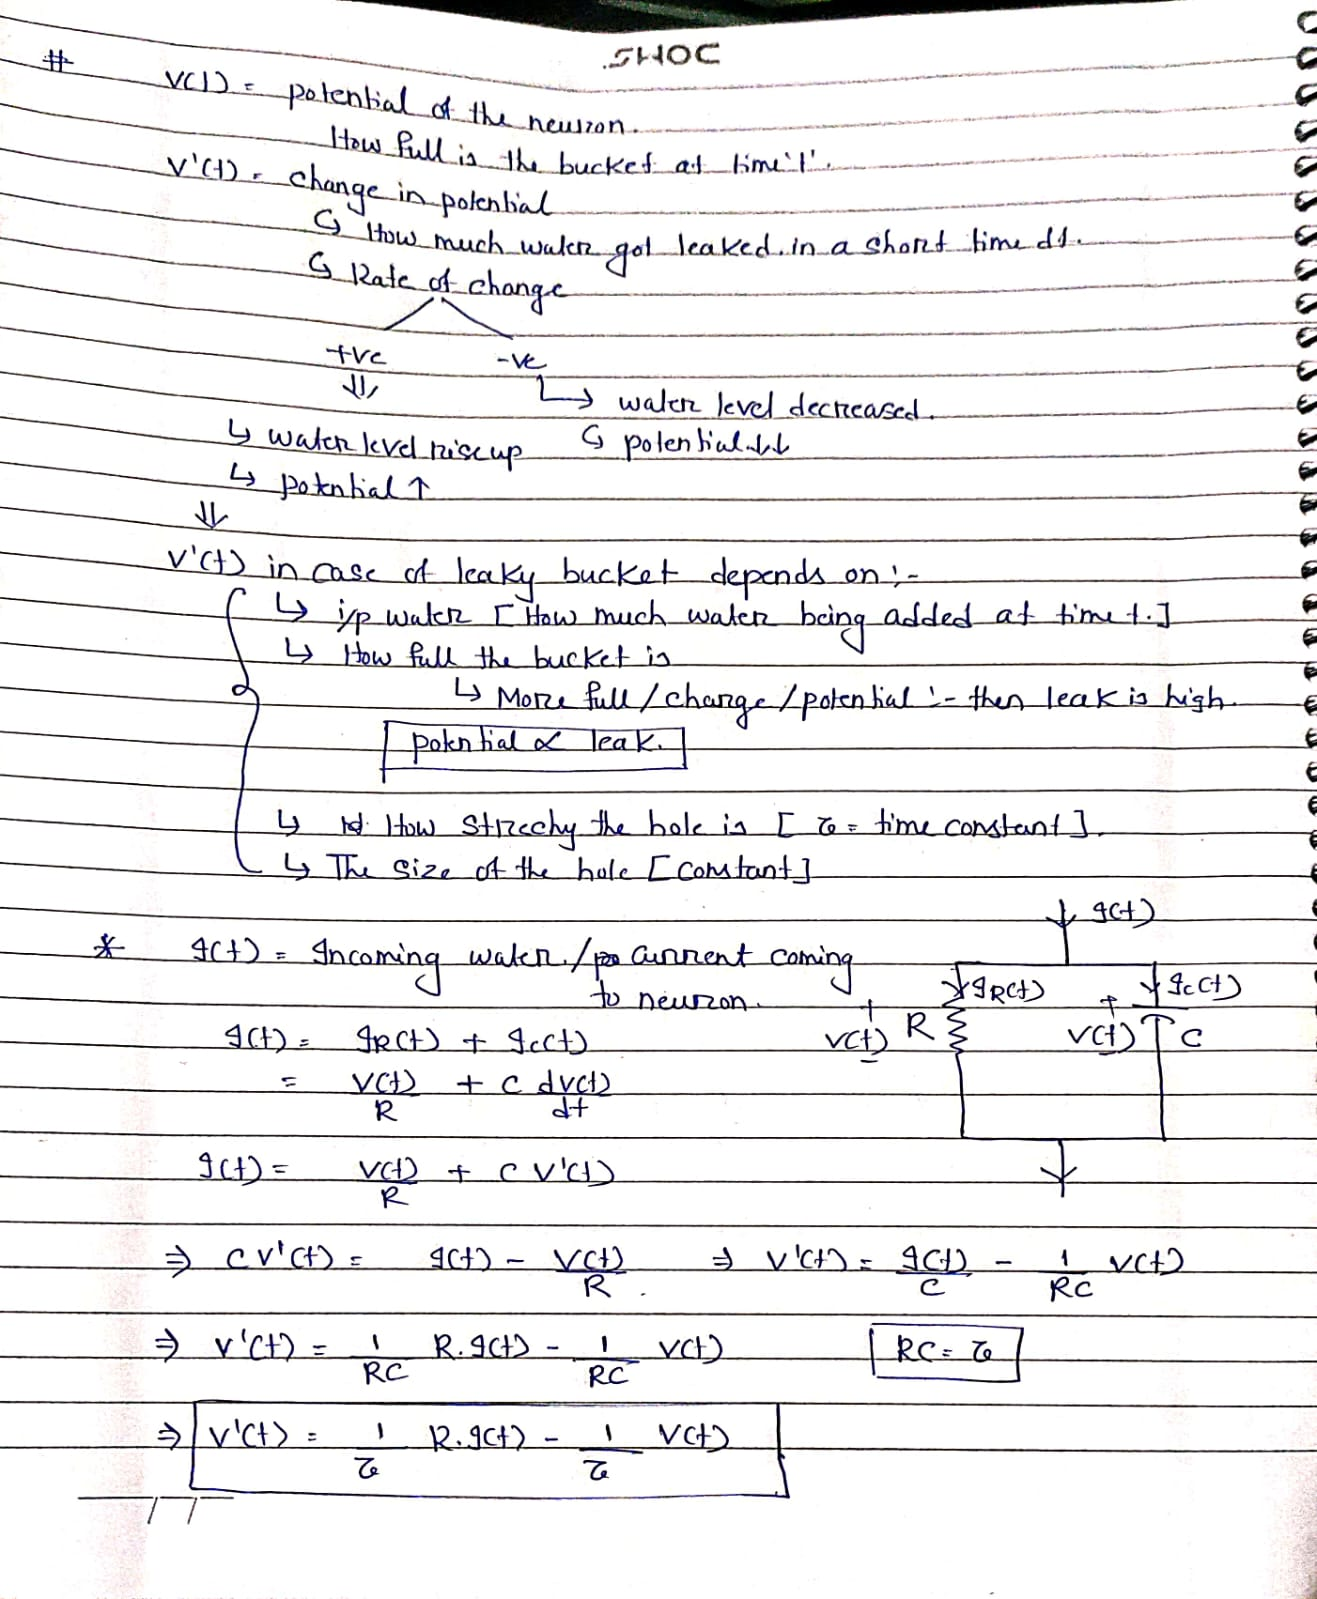

In [1]:
class FirstOrderLI: 
    def __init__(self, tau_rc=0.2, v_init=0): 
        self.tau_rc = tau_rc 
        self.v      = v_init

    def step(self, I, t_step): 
        self.v = self.v * (1 - t_step / self.tau_rc) + I * t_step / self.tau_rc

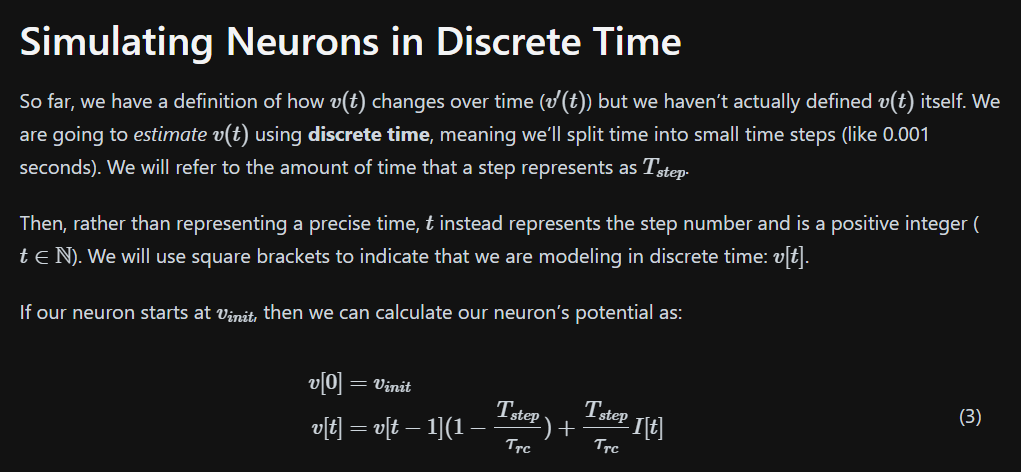

In [2]:
neuron1 = FirstOrderLI()
neuron2 = FirstOrderLI(tau_rc= 0.02, v_init= 0.1)

In [3]:
#step-0: intial condition
print(f"step 0: {neuron1.v = }")
print(f"step 0: {neuron2.v = }")

# step-1: applying step() input: 0.5 current for 1 ms
neuron1.step(0.5, 0.001)
neuron2.step(0.5, 0.001)
print(f"step 1: {neuron1.v = }")
print(f"step 1: {neuron2.v = }")

#step-2: applying no current for 1 ms
neuron1.step(0, 0.001)
neuron2.step(0, 0.001)
print(f"step 2: {neuron1.v = }")
print(f"step 2: {neuron2.v = }")

step 0: neuron1.v = 0
step 0: neuron2.v = 0.1
step 1: neuron1.v = 0.0025
step 1: neuron2.v = 0.12
step 2: neuron1.v = 0.0024875
step 2: neuron2.v = 0.11399999999999999


In [4]:
# lets simulate a neuron for some time period:
neuron3 = FirstOrderLI(tau_rc= 0.2, v_init= 0.6)

In [5]:
import numpy as np

T_step = 0.001 # 1 msec
duration = 2.0 
I = 0 
v_history = []

times = np.arange(0, duration, T_step)
for t in times:
    v_history.append(neuron3.v)
    neuron3.step(I, T_step)

print(v_history[:5], "... ", v_history[-5:]) 

[0.6, 0.597, 0.594015, 0.5910449249999999, 0.588089700375] ...  [2.7239387514018173e-05, 2.7103190576448083e-05, 2.6967674623565844e-05, 2.6832836250448015e-05, 2.6698672069195774e-05]


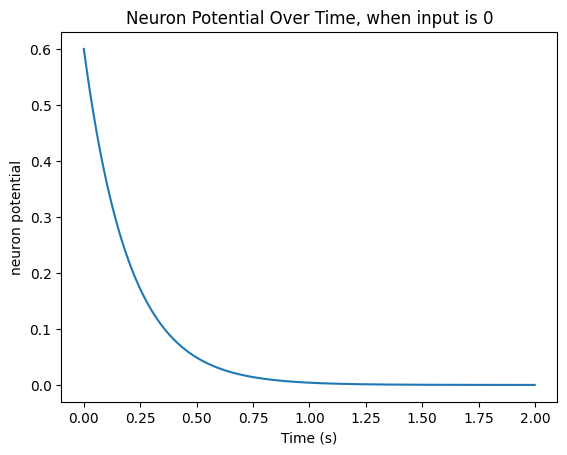

In [6]:
# Lets plot it using matplotlib
import matplotlib.pyplot as plt

plt.figure()
plt.plot(times, v_history)
plt.xlabel('Time (s)')
plt.ylabel('neuron potential')
plt.title('Neuron Potential Over Time, when input is 0')
plt.show()

lets learn about lambda function:
lambda arguments: expression

example:
square = lambda x: x ** 2
print(square(5))  # Output: 25


In [7]:
# square wave example:
def square_wave(off_time, on_time=None):
    if on_time is None:  
        on_time = off_time  # If on_time is not given, make it equal to off_time

    # Lambda function that returns 1 or 0 based on time `t`
    return lambda t: 1 if (t % (off_time + on_time)) < off_time else 0

wave = square_wave(3, 2)  # 3 seconds ON, 2 seconds OFF

print(wave(0))  # Output: 1 (ON): 0 modulo 5 is less than 3: so on
print(wave(3))  # Output: 0 (OFF): 3 modulo 5 is not less than 3: so off
print(wave(5))  # Output: 1 (ON): 5 modulo 5 is less than 3: so on
print(wave(7))  # Output: 0 (OFF): 7 modulo 5 is not less than 3: so off


1
0
1
1


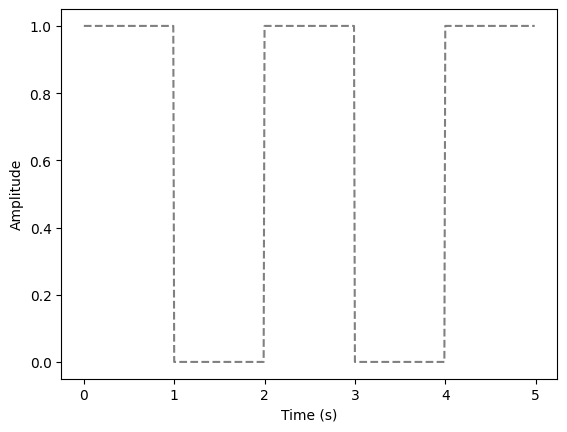

In [8]:
# now lets use a sqaure wave current input:
# designing a sqaure wave :

def square_wave_func(off_time_interval, on_time_interval=None): 
    """
    off_time_interval: time interval for which the square wave is 0
    on_time_interval: time interval for which the square wave is 1
    """
    if on_time_interval is None:  
        on_time_interval = off_time_interval
    
    return lambda t: 1 if (t % (off_time_interval + on_time_interval)) < off_time_interval else 0 

square_wave = square_wave_func(1) 

times = np.arange(0, 5, 0.01) 
square_wave_values = [square_wave(t) for t in times] 

plt.figure() 
plt.plot(times, square_wave_values, color="grey", linestyle="--") 
plt.xlabel('Time (s)') 
plt.ylabel('Amplitude') 
plt.show() 

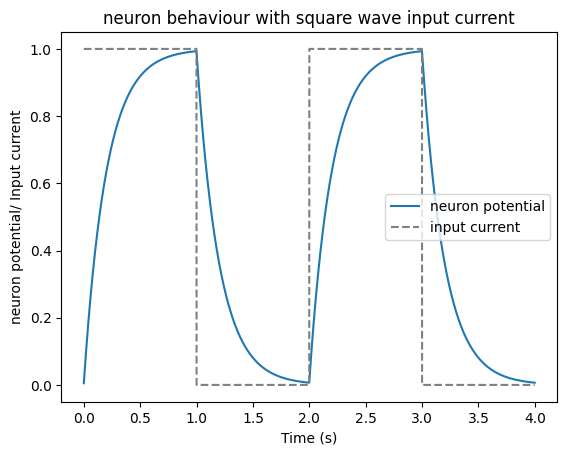

In [9]:
# Lets perform our simulation again for 4 sec:
duration = 4 
neuron = FirstOrderLI()
v_history = []
I_history = []
T_step = 0.001
times = np.arange(0, duration, T_step)

for t in times:
    I = square_wave(t)
    neuron.step(I, T_step)

    v_history.append(neuron.v)
    I_history.append(I)

# plot:
plt.figure()
plt.plot(times, v_history)
plt.plot(times, I_history, color = "grey", linestyle = "--")
plt.xlabel('Time (s)')
plt.ylabel( 'neuron potential/ Input current')
plt.legend(["neuron potential", "input current"])
plt.title('neuron behaviour with square wave input current')
plt.show()

* So we have modeled a neuron which represents potential over time. However we havent implemented a crucial part of the neuron, which is firing.

# Chapter-2: Understading first order LIF neuron:

In [10]:
## Lets design LIF!
## 2 parameters additional: Vthres and refractory period.

class FirstOrderLIF:
    def __init__(self, tau_rc = 0.2, tau_ref = 0.002, v_init = 0, v_th = 1.0):
        self.tau_rc = tau_rc
        self.v = v_init
        self.v_th = v_th
        self.tau_ref = tau_ref
        self.output = 0
        self.refractory_time = 0  

    def step(self, I, t_step):
        # checking neuron is still in refractory period or not
        self.refractory_time -= t_step

        if self.refractory_time <= 0:
            self.v = self.v * (1 - t_step / self.tau_rc) + I * t_step / self.tau_rc

        # now output:
        if self.v >= self.v_th:
            self.refractory_time = self.tau_ref
            self.output = 1/ t_step #some certain value
            self.v = 0
        else:
            self.output = 0
        return self.output

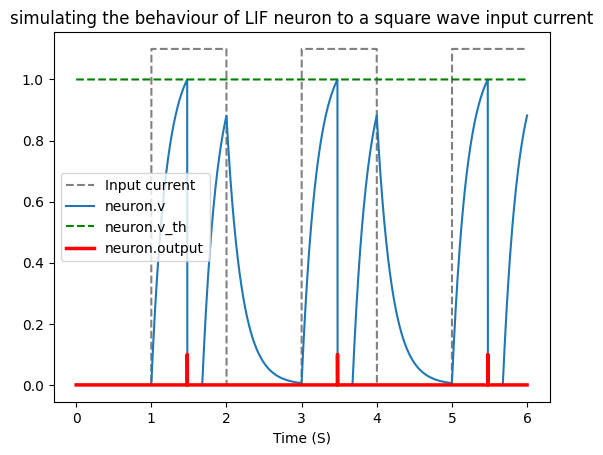

In [11]:
# Lets do simulation:
duration = 6
T_step = 0.001
times = np.arange(0, duration, T_step)

neuron = FirstOrderLIF(tau_ref=0.2)

def square_wave(t):
    return 0 if (t % 2) < 1 else 1.1

I_history = []
v_history = []
output_history = []
vth_history = []

for t in times:
    I = square_wave(t)
    neuron.step(I, T_step)
    I_history.append(I)
    v_history.append(neuron.v)
    output_history.append(neuron.output * T_step/ 10)
    vth_history.append(neuron.v_th)

plt.figure()
plt.plot(times, I_history, color = "grey", linestyle = "--")
plt.plot(times, v_history)
plt.plot(times, vth_history, color = "green", linestyle ="--")
plt.plot(times, output_history, color = "red", linewidth = 2.5)
plt.xlabel('Time (S)')
plt.legend(['Input current', 'neuron.v', 'neuron.v_th', 'neuron.output']) 
plt.title('simulating the behaviour of LIF neuron to a square wave input current')
plt.show()

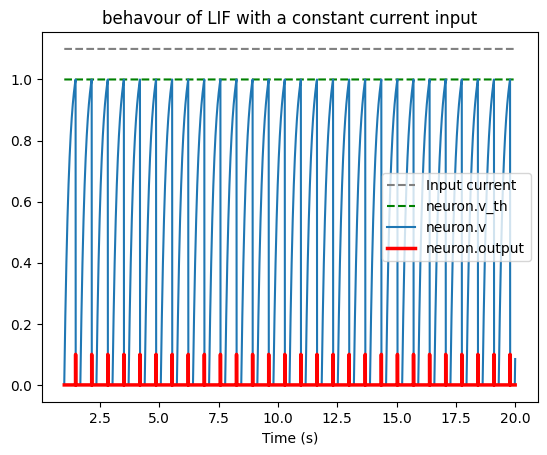

In [12]:
# Simulation of LIF for 20 sec with a constant source of input:

def fullPlot(I):
    duration = 20  
    T_step = 0.001 
    times = np.arange(1, duration, T_step) 

    neuron = FirstOrderLIF(tau_ref = 0.2) 

    I_history = []
    v_history = []
    output_history = []
    vth_history = []

    for t in times: 
        neuron.step(I, T_step) 

        I_history.append(I)    
        v_history.append(neuron.v) 
        output_history.append(neuron.output * T_step / 10) # scaled output
        vth_history.append(neuron.v_th) 


    plt.figure() 
    plt.plot(times, I_history, color="grey", linestyle="--")
    plt.plot(times, vth_history, color="green", linestyle="--")
    plt.plot(times, v_history)
    plt.plot(times, output_history, color="red", linewidth=2.5)
    plt.xlabel('Time (s)') 
    plt.legend(['Input current', 'neuron.v_th', 'neuron.v', 'neuron.output']) 
    plt.title('behavour of LIF with a constant current input')
    plt.show() 
    
# Run the simulation with an input current:

fullPlot(1.1) 

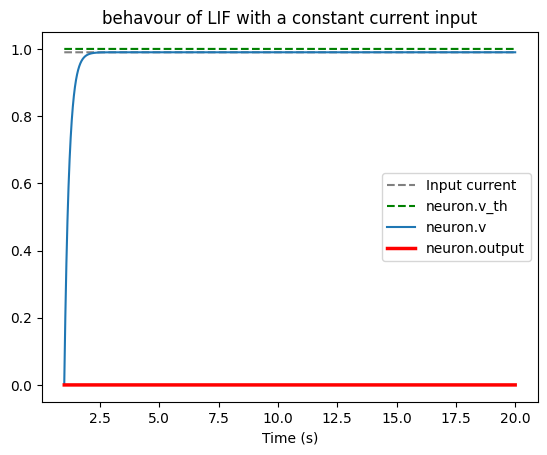

In [13]:
fullPlot(0.99)

# Chapter-3: Understanding firing rates and spiking activity of LIF neuron:

### understanding plt.axvline():
syntax: plt.axvline(x, color='black', linestyle='-', linewidth=1)

Parameter	  Meaning
x	          The x-coordinate where the vertical line is drawn
color	      Line color (default: black)
linestyle	  Type of line: '-' (solid), '--' (dashed), ':' (dotted)
linewidth	  Thickness of the line


plt.axvline(x) draws a vertical line at x.
Used to highlight important events, like spikes in neuron activity.
Thin red lines are commonly used in spike train visualizations.

In [14]:
def PlotSpikes(neuron, duration, t_step, input_current):
    spike_times= []
    time_points = []

    time = 0.0
    # simulation:
    while time < duration:
        output = neuron.step(input_current, t_step)
        time_points.append(time)

        if output > 0:
            # this means neuron is spiking, beacuse output has 2 states 0 or a certain psoitive amplitude indicating spiking.
            spike_times.append(time)
        time += t_step

    # plot spikes:
    plt.figure(figsize=(7,0.3))
    for spike_time in spike_times:
        plt.axvline(x=spike_time, color='red', linewidth=0.5)
    plt.axis('off') 
    # here removing axis label only focuses on spiking plot.
    plt.show()

    #output message:
    num_spikes= len(spike_times)
    spike_rate = num_spikes/ duration
    output_message = f"An input current of {input_current} produces {num_spikes} spikes in {duration} with spiking frequency {spike_rate:.2f} Hz"
    return output_message

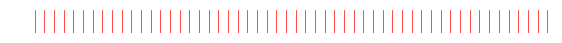

'An input current of 1.00000001 produces 54 spikes in 30 with spiking frequency 1.80 Hz'

In [15]:
neuron_4 = FirstOrderLIF(tau_rc= 0.02, tau_ref= 0.2)
PlotSpikes(neuron_4, duration= 30, t_step= 0.001, input_current= 1.00000001)

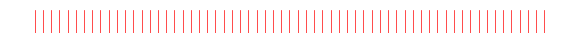

'An input current of 1.000001 produces 63 spikes in 30 with spiking frequency 2.10 Hz'

In [16]:
PlotSpikes(neuron_4, duration= 30, t_step= 0.001, input_current= 1.000001)

with slight input current of 1.000001 we can see neuron is firing almost 2 times in a sec.

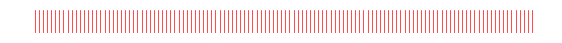

'An input current of 1.1 produces 122 spikes in 30 with spiking frequency 4.07 Hz'

In [17]:
PlotSpikes(neuron_4, duration= 30, t_step= 0.001, input_current= 1.1)

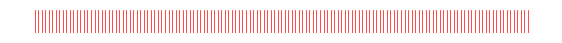

'An input current of 2 produces 141 spikes in 30 with spiking frequency 4.70 Hz'

In [18]:
PlotSpikes(neuron_4, duration= 30, t_step= 0.001, input_current= 2)

Therefore increase in current will make neuron to fire with more frequencies, it clarifies intuition.

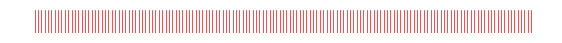

'An input current of 10 produces 149 spikes in 30 with spiking frequency 4.97 Hz'

In [19]:
PlotSpikes(neuron_4, duration= 30, t_step= 0.001, input_current= 10)

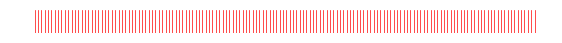

'An input current of 20 produces 150 spikes in 30 with spiking frequency 5.00 Hz'

In [20]:
PlotSpikes(neuron_4, duration= 30, t_step= 0.001, input_current= 20)

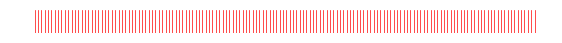

'An input current of 50 produces 150 spikes in 30 with spiking frequency 5.00 Hz'

In [21]:
PlotSpikes(neuron_4, duration= 30, t_step= 0.001, input_current= 50)

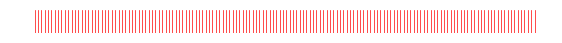

'An input current of 100 produces 150 spikes in 30 with spiking frequency 5.00 Hz'

In [22]:
PlotSpikes(neuron_4, duration= 30, t_step= 0.001, input_current= 100)

Observation: when we are increasing input current after a limit: frequency of spiking activity barely increasing due to refractory time period.

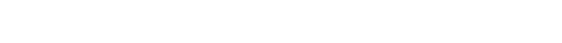

'An input current of 0.99998 produces 0 spikes in 30 with spiking frequency 0.00 Hz'

In [23]:
PlotSpikes(neuron_4, duration= 30, t_step= 0.001, input_current= 0.99998)

Therefore there is a realtion between input current and output frequency: lets try to plot and underatnd the behaviour.

* As we can see, different inputs lead to different spike frequencies. We can plot this relationship between input and output as a graph, which is called a tuning curve. Let’s plot the tuning curve of our neuron, where the x-axis is the input current and the y-axis is the output firing rate:

In [24]:
def GetSpikeRate(neuron, input_current, time_period = 10, t_step= 0.001):
    count = 0
    # num_steps is how many times we can call neuron.step()
    num_steps = int(time_period / t_step)

    for t in range(num_steps):
        output = neuron.step(input_current, t_step) # either 0 or certain value
        if output > 0:
            # neuron is definitely spiking hence incrraing the spike count
            count += 1
            
    spike_rate = count / time_period
    return spike_rate


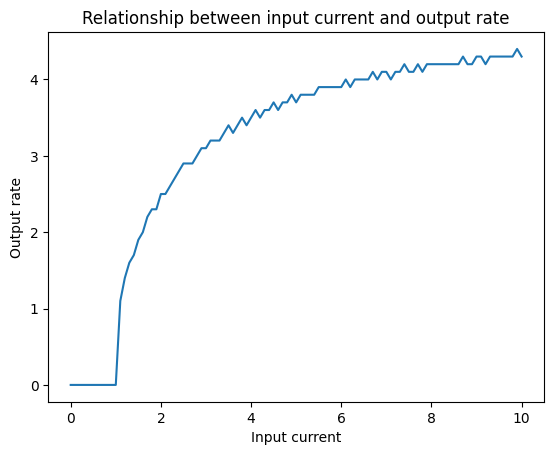

In [25]:
inputs = np.arange(0, 10.1, 0.1)
output_rates = []

neuron_5 = FirstOrderLIF(tau_rc= 0.3, tau_ref= 0.2)
for i in inputs:
    output_rate = GetSpikeRate(neuron_5, i)
    output_rates.append(output_rate)

plt.figure()
plt.plot(inputs, output_rates)
plt.xlabel('Input current')
plt.ylabel('Output rate')
plt.title('Relationship between input current and output rate')
plt.show()


mathematical derived relation between input current and rate of firing:


rate(I) = 0                                                                 # I <= v_th

rate(I) = 1 / (neuron.tau_ref - neuron.tau_rc * np.log(1 - neuron.v_th/I))  # otherwise

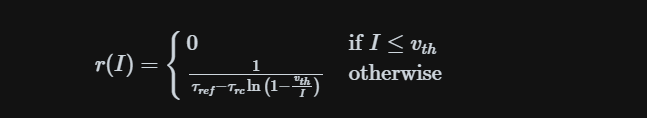

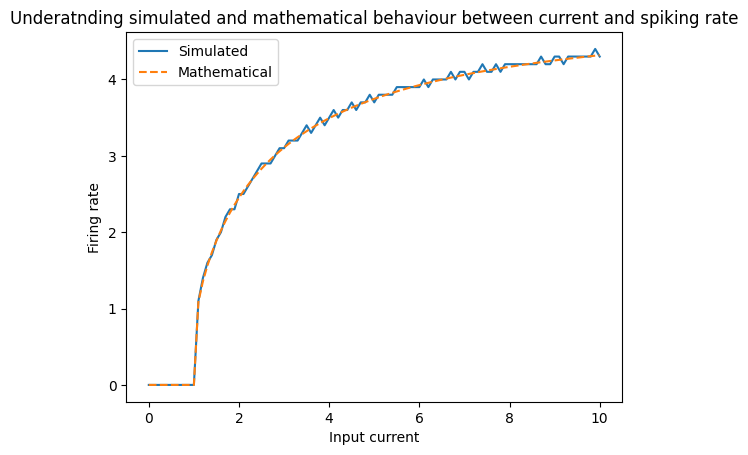

In [26]:
# Analytically :
def AnalyticalRate( neuron, I):
    if I <= neuron.v_th:
        return 0
    else:
        rate = 1 / (neuron.tau_ref - neuron.tau_rc * np.log(1 - neuron.v_th/I))
        return rate

neuron_6 = FirstOrderLIF(tau_rc= 0.3, tau_ref= 0.2)
inputs = np.arange(0, 10.1, 0.1)
analytical_rate =[]    

for i in inputs:
    analytical_rate.append(AnalyticalRate(neuron_6, i))
# plot:
plt.figure()
plt.plot(inputs, output_rates)
plt.plot(inputs, analytical_rate, color = 'C1', linestyle = '--')
plt.xlabel('Input current')
plt.ylabel('Firing rate')
plt.legend(['Simulated', 'Mathematical'])
plt.title('Underatnding simulated and mathematical behaviour between current and spiking rate')
plt.show()

This looks like a good match! The firing rate that we computed analytically matches what we observe in the simulation.

## summary:
1. So we observaed that neuron doesnt react to input current until it touches V_th, returing spiking output to 0. After that it starts firing and firing rate is proportional to the incoming current.
2. The firing rate eventually flattens out after a certain value of current beacause of refractory period of neuron, where it cant take any input neither it can fire.
3. mathematically derived relation is emulating our simulation result: hence we can appriciate our intuition on LIF neuron's behaviour.

# Chapter-4: Understanding Synapse and implementing Synaptic model

So for now, we have designed individual LIF neuron, but we havent connected them with each other, therefore we need to design a synaptic layer/ model to design and connect LIF neuron.

Assumptions:
1. We will use pre-synaptic to refer neuron sending the spike and post synaptic neuron receiving the spikes. 
2. Many pre-synaptic neuron might connect to a single post-synaptic neuron, and post-synaptic neuron can also connect back to pre-syanptic neurons forming a closed loop.

Observation:

So far we have designed spikes as binary event like "on" or "off" signal. However, in real -world scenarios, action potential are not binary. These are continous gain and lowering of potential energy, therefore we are missing the biological realism. 

2nd problem is that there is no memory in binary spiking, meaning the history of neuron's firing doesnt tell about its current state.

So when we pass information between neurons, we dont directly pass these binary spiking outputs to each other, rather will pass those binary events through a synaptic model. Therefore we need a practical implementation synaptic model that ensures communication between neurons.

### addressing the first problem: Biological realsim:

Decaying Synaptic Model:
A decaying synaptic model describes how synaptic currents or potentials gradually decrease over time rather than disappearing instantly after a spike. This decay introduces a memory effect, where past spikes still influence the neuron for a short period.

Key Concept:
When a presynaptic neuron fires, it releases neurotransmitters, which increase the synaptic current in the postsynaptic neuron. But instead of an instant drop to zero, this current decays gradually over time.

intution:
1. The synaptic response (excitatory or inhibitory) lasts for a short period, shaping the next neuron’s response.
2. Decay allows neurons to sum multiple inputs over time, instead of reacting only to the most recent spike. This is crucial for pattern recognition, where a neuron needs to respond based on a history of past spikes, not just an isolated spike.
3. Without decay, a neuron would only respond to one instant and then reset immediately. Decay ensures that even if a neuron doesn’t fire immediately, past spikes can still contribute to its activation.

Mathematical model of decaying synaptic model:


## Decaying Synaptic Model

The synaptic current $I_{\text{syn}}(t)$ follows an exponential decay over time and is updated by incoming spikes. The equation governing its dynamics is:

$$
\tau_{\text{syn}} \frac{dI_{\text{syn}}}{dt} = -I_{\text{syn}} + w S(t)
$$

where  
Isyn    = synaptic current  
tau_syn = synaptic time constant indicates how fast the synaptic potential decays to 0.
w       = synaptic weight  
S(t)    = pre -synaptic spike train (1 or 0)  

intuition:  
-I_syn causes current to decay gradually over time. When S(t) occurs, the synaptic current is increased by w, but then it fades gradually.



$$
I_{\text{syn}}(t) = w e^{-\frac{(t - t_{\text{spike}})}{\tau_{\text{syn}}}}
$$




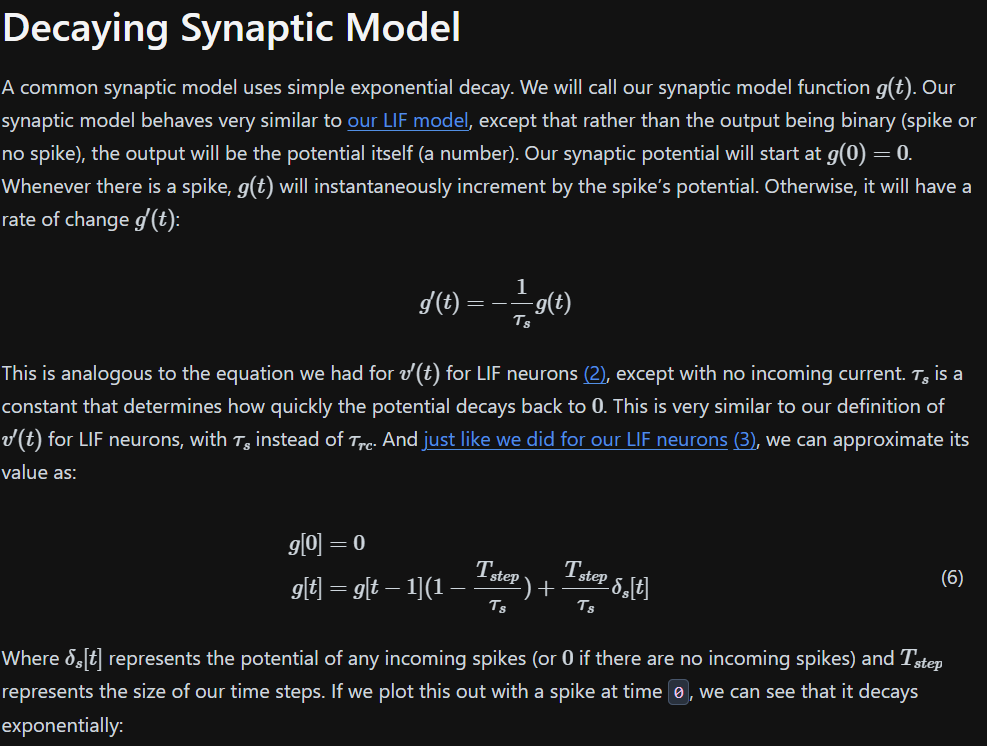

Ensuring the Spike Happens at the Right Time  
Since our simulation uses discrete time steps, t = 0 might not be exactly present in the times array.  
isZero(t) ensures we capture the spike event even if t = 0 is slightly off due to floating-point precision.

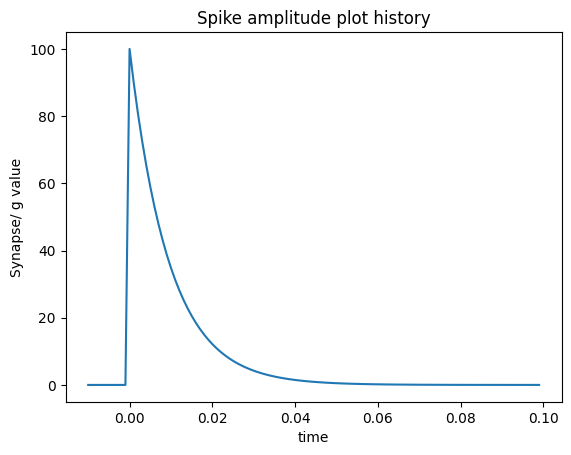

In [27]:
tau_s = 0.01
t_step = 0.001

times = np.arange(-0.01,0.1, t_step)

# Since t_step is 0.001, this checks if t is very close to zero. It ensures that we detect the spike precisely at t=0
def IsZero(t):
    return abs(t) < t_step / 2

g = 0
g_values = []


# at t-> 0: neuron receives a spike of magnitude 1/t_step, all other times it receives 0
for t in times:
    if IsZero(t):
        spike_input = 1 / t_step
    else:
        spike_input = 0

    g = g * (1 - t_step / tau_s) + spike_input * t_step / tau_s # synapse input--> LIF neuron's output
    g_values.append(g)

# plotting:
plt.figure()
plt.plot(times, g_values)
plt.xlabel('time')
plt.ylabel('Synapse/ g value')
plt.title('Spike amplitude plot history')
plt.show()

Observation from the above plot:  
* Our synapse is delivering the same potential to the post synaptic neuron regradless the value of tau_s. however, for larger values of tau_s it is spreading the potetial out further over time.  
* area under this curve will stay approximate to 1. here area under the curve represents total potential delivered to post synaptic neuron.

In [28]:
import ipywidgets as widgets
from IPython.display import display

In [29]:
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
from IPython.display import display

# Function to update the plot dynamically
def plot_synapse(tau_s=0.021, t_step=0.005):
    times = np.arange(0, 0.25, t_step)

    def isZero(t): return abs(t) < t_step / 2  # check if t is close to zero

    areaUnderCurve = 0
    g = 0
    g_values = []
    for t in times:
        if isZero(t): spike_input = 1 / t_step  # Spike input at t = 0
        else:         spike_input = 0

        g = g * (1 - t_step / tau_s) + spike_input * t_step / tau_s
        g_values.append(g)

        areaUnderCurve += g * t_step

    # Plot the data
    plt.figure(figsize=(6, 4))
    plt.plot(times, g_values, label="Synaptic Conductance")
    plt.bar(times, g_values, color='black', edgecolor="#999", width=t_step, alpha=0.5)
    plt.xlabel('Time (s)')
    plt.ylabel('Conductance (g)')
    plt.title(f"Synaptic Conductance Decay (tau_s={tau_s}, t_step={t_step})")
    plt.legend()
    plt.show()

    print(f"Area under curve: {areaUnderCurve}")

# Create sliders for tau_s and t_step
tau_s_slider = widgets.FloatSlider(value=0.021, min=0.010, max=0.040, step=0.001, description="tau_s:")
t_step_slider = widgets.FloatSlider(value=0.005, min=0.001, max=0.01, step=0.001, description="t_step:")

# Display sliders and plot
widgets.interactive(plot_synapse, tau_s=tau_s_slider, t_step=t_step_slider)


interactive(children=(FloatSlider(value=0.021, description='tau_s:', max=0.04, min=0.01, step=0.001), FloatSli…

* Similar to first order LIF class here we are designing first order synapse class to represent post synaptic potentail.  
* it will have 2 instance varible, tau_s and output. output represnts potential of the synapse.
* It is having one method : step(input_potential, t_step): a function that advances our neuron and synaptic model by one time step. It will take two arguments: (1) ip_v, the input potential from the pre-synaptic neuron and (2) t_step, the size of our time step. It will return the output potential of the synapse.

In [30]:
## lets connect LIF to this decaying synaptic model:
## PSP : post synaptic potential

class FirstOrderSynapse:
    def __init__(self, tau_s= 0.01):
        self.tau_s = tau_s
        self.output = 0

    def step(self, ip_v, t_step):
        # decay syanpse mathematical model:
        self.output = self.output * (1 - t_step / self.tau_s) + ip_v * t_step / self.tau_s
        return self.output


In [31]:
## now the fun begins:
## lets instantiate both neuron and synapse and write one combined step function for them.

neuron  = FirstOrderLIF(tau_rc= 0.02, tau_ref= 0.2)
synapse = FirstOrderSynapse(tau_s= 0.2)

def CombinedStep(I, t_step):
    neuron_output  = neuron.step(I, t_step)   
    synapse_output = synapse.step(neuron_output, t_step) #neuron's output is the input to synapse: potential
    return synapse_output


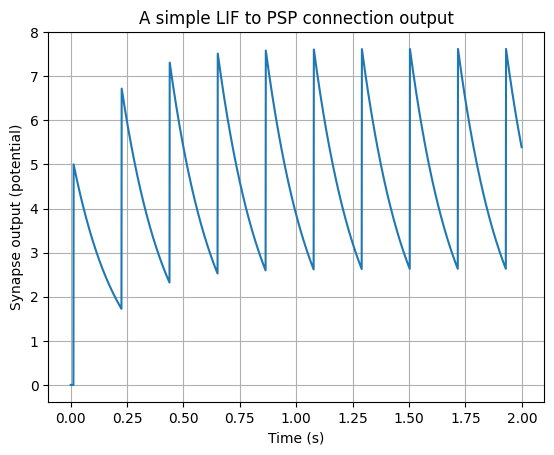

In [32]:
# simulation:
t_step = 0.001
times  = np.arange(0, 2, t_step)
I      = 2  # input current to neuron

output_history = []

for t in times:
    output = CombinedStep(I, t_step)
    output_history.append(output)

#plot:
plt.figure()
plt.plot(times, output_history)
plt.xlabel('Time (s)')
plt.ylabel('Synapse output (potential)')
plt.grid(True)
plt.title("A simple LIF to PSP connection output")
plt.show()

The image shows the synaptic output of a Leaky Integrate-and-Fire (LIF) neuron with a first-order synapse over a time span of 2 seconds.  

Key Observations:  
1. Repeated Spikes (Peaks)-> this is due to LIF neuron  

    * The plot shows periodic spikes in the synapse output, meaning the neuron is firing at regular intervals.
    * This occurs because the LIF neuron receives a constant input current I=2, leading to regular firing due to the membrane potential reaching the threshold.

2. Decay Between Spikes --> this is synaptic decay behaviour

    * After each spike, the synapse output gradually decays.
    * This is due to the synaptic time constant tau_s=0.2, which models how long the synapse takes to decay after receiving input from the neuron.
    * The decay follows an exponential decrease, meaning the synapse does not instantly drop to zero but slowly decreases over time.

3. Increasing and Stabilizing Peaks

    * The first few peaks increase in height because the synapse accumulates more charge before stabilizing.
    * Once the system reaches steady-state, the peaks remain nearly constant, meaning the synapse has reached an equilibrium between input from the neuron and its decay over time.

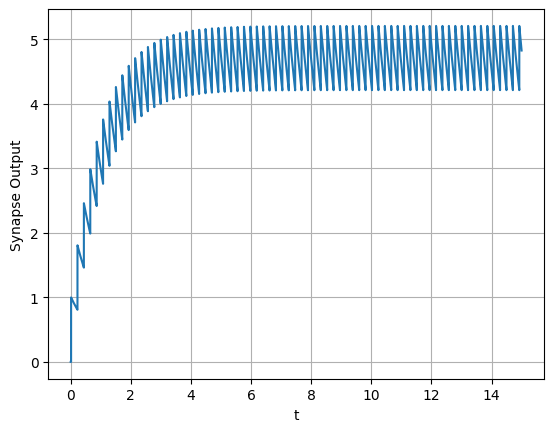

In [33]:
# simulating for 18 sec:
neuron  = FirstOrderLIF(tau_rc=0.02, tau_ref=0.2)
synapse = FirstOrderSynapse(tau_s=1.0)

def combinedStep(I, t_step):
    neuron_output  = neuron.step(I, t_step)
    synapse_output = synapse.step(neuron_output, t_step)
    return synapse_output

T_step = 0.001
times  = np.arange(0, 15, T_step)
I      = 2 # Input current

output_history = []

for _ in times:
    output = combinedStep(I, T_step)
    output_history.append(output)

plt.figure()
plt.plot(times, output_history)
plt.xlabel('t')
plt.ylabel('Synapse Output')
plt.grid(True)
plt.show()

This plot represents the synaptic output of a Leaky Integrate-and-Fire (LIF) neuron with a first-order synapse, running for 18 seconds with a constant input current of I=2  

#### Some intuitions out of this plot:
1. Why does the output keep increasing initially?
    * The LIF neuron integrates the input current and fires periodically when it reaches the threshold.
    * Each spike triggers the synapse, which accumulates charge based on the synaptic time constant tau_s.
    * The repeated firing leads to successive increases in the synapse output because each new spike adds to the remaining charge from previous spikes.
    * This results in a gradual buildup of the synapse output until it reaches a balance between input accumulation and decay.

2. How is the amplitude is related to the input current (I=2)?
    * this is not a discrete input first order system, its a cascade of 2 first order system with a continous input.
    * Steady state analysis. g_infinite depends upon neuron firing rate, which itself depends upon input current (I) , tau_rc, tau_ref.
    * To calculate steady state value, first need to calculate rate of firing of LIF neuron, approx f= 25. now staeady state value is f*tau_s which is 25* 0.2 almost 5.

3. Oscillating behaviour?
    * The oscillations occur because the LIF neuron fires in discrete spikes.
    * The synapse retains past activity but also forgets gradually, meaning:
        * It "remembers" past spikes but only for a limited duration (governed by tau_s)
    * This partial memory effect is what allows synapses to smooth out spikes and create a continuous response.
    * However, it does not have long-term memory because the synaptic charge eventually decays if the input stops.


# Chapter-5: Encoding & Decoding Information

* How information is represnted in spike train? 
* Neurons’ spiking patterns contain information about the stimulus that is causing them to fire. However, the form of this information (spike trains—series of spikes over time) can be difficult to interpret.
*  We might want to know if these spikes are actually conveying the information that we care about or not. In order to do that, we need to decode the series of spikes to re-estimate the original message.  

There are many theories of how information is represented in spike trains. Near the periphery, however, it appears that information is “rate-coded”—the firing rate of a spike train represents some information about the underlying stimulus. Let’s take the example where we have an input in the form of an oscillating sin wave:

In [34]:
# sine-wave input instead of square input current:
import math

def sine_wave(t):
    return 2* math.sin(t)
sine_wave(2)

1.8185948536513634

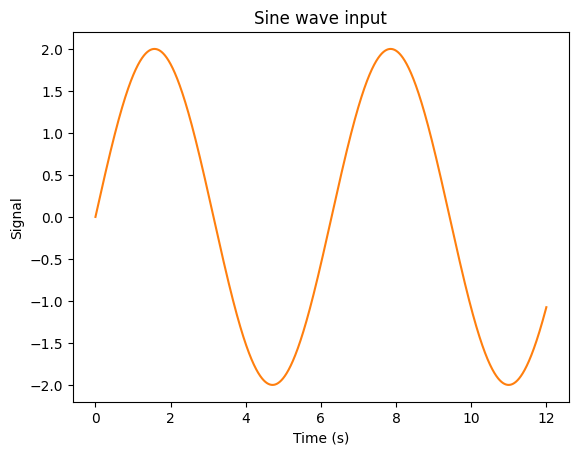

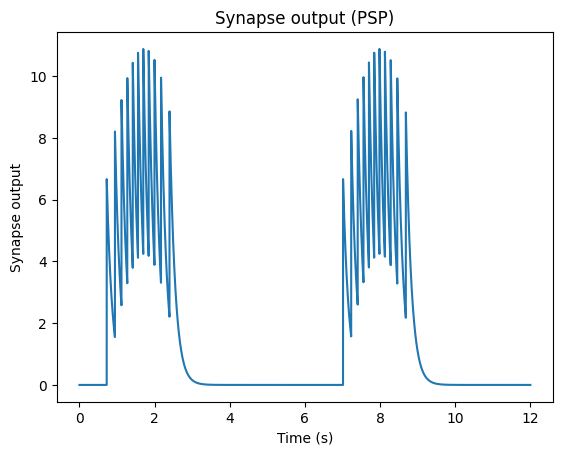

In [35]:
# lets instantiate again our neuron and synapse:
neuron = FirstOrderLIF(tau_rc=0.2, tau_ref= 0.002)
synapse = FirstOrderSynapse(tau_s= 0.15)

# plotting sine input vs time for 12 sec:
t_step = 0.001
times = np.arange(0, 12, t_step)
signal_out =[]
psp_out =[]

for t in times:
    signal = sine_wave(t)
    neuron.step(signal, t_step)
    synapse.step(neuron.output, t_step)
    signal_out.append(signal)
    psp_out.append(synapse.output)

# plot - sien wave input vs time
plt.figure()
plt.plot(times, signal_out, color = "C1")
plt.xlabel("Time (s)")
plt.ylabel("Signal")
plt.title("Sine wave input")
plt.show()

# plot: synapse output vs time
plt.figure()
plt.plot(times, psp_out)
plt.xlabel("Time (s)")
plt.ylabel("Synapse output")
plt.title("Synapse output (PSP)")
plt.show()

Observations from the above plot:  
* previously we used a sqaure wave/ a constant current source as input: that time neuron and syanpase was receiving sharp transitions between on/ off state.
* Now in the case of sine wave: input is gradually increasing and decreasing.
* one obs is it is almost following the input sine wave. If that is the case then we can further try to reconstruct our original signal out of the synapse output. ohhhhh that seems intersting.

* So basically we can find some scaling factor which can scale our output synapse to match the input sine wave. That is the idea. Let us try to find that scaling factor. One method can be implementing least sqaure as g(t) is a transformed version of x(t).

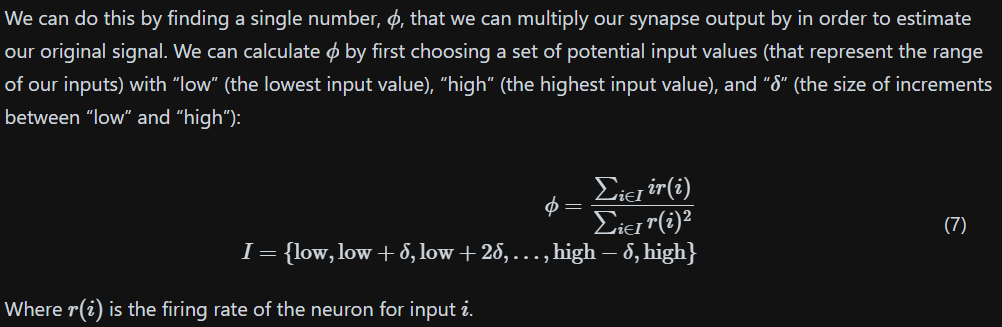

* So basically the scaling factor = firing rate * current isntances / (firing rate)^2

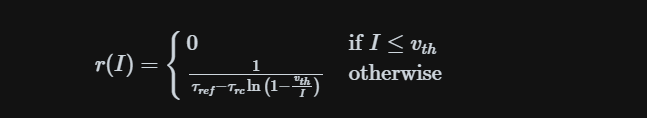

In [36]:
## So this means with firing rate (r(i)) we can obtain the scaling factor:

def AnalyticalRate(neuron, I):
    if I <= neuron.v_th:
        return 0
    else:
        return 1 / (neuron.tau_ref - neuron.tau_rc * np.log(1 - neuron.v_th/I))
    
def compute_decoder(neuron, range_low=-2, range_high=2, interval=0.1):
    numerator   = 0
    denominator = 0
    for i in np.arange(range_low, range_high, interval):
        r = AnalyticalRate(neuron, i)
        numerator   += r * i
        denominator += r * r
    return numerator / denominator




0.3229210069532396


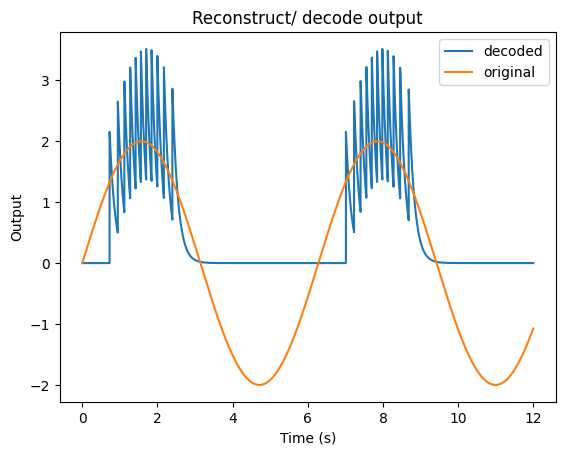

In [37]:
#neuron = FirstOrderLIF()  
decoder = compute_decoder(neuron, -2, 2)
print(decoder)

decoded_output = []
# so basically will multiply psp output to this scaled factor to obtain original image:
for o in psp_out:
    decoded_output.append(decoder * o)

# plot:
plt.figure()
plt.plot(times, decoded_output)
plt.plot(times, signal_out)
plt.xlabel('Time (s)')
plt.ylabel('Output')
plt.legend(['decoded', 'original'])
plt.title("Reconstruct/ decode output")
plt.show()

Nice! so this is behaving like rate-based coding: where the firing rate follows the input. and if input is negative, neuron doesnt react. Further good synaptic filtering may produce more refined construction.

#### Understanding rate coding:
* When the input signal is high, the neuron fires more frequently (higher rate).
* When the input signal is low, the neuron stops firing (or fires at a much lower rate).
* The overall shape of the signal is encoded in the average firing rate over time.

This is a hallmark of rate coding, where information is not in the precise timing of spikes but rather in how often they occur. 

* Few more coding techniques are: will got hrough it later.  
        1. Temporal coding: Information is encoded in the precise timing of spikes.  
            * phase encoding:   
            * latency endoing:  
        2. Population coding: Information is encoded in the collective activity of a population of neurons.  
        3. rank order coding:  
        4. sparse coding:  
        5. Burst coding:

# Section- 5.1: Undersatnding using SNNTorch:

#### Understanding spike encoding:
* Light is what we see when the retina converts photons into spikes.
* Touch is what we feel when nerve endings turn tactile pressure into spikes.
* Sound is what we hear when the cochlea converts vibrations into spikes.

So the point is spikes are global currencies for brain. So if our objective is to work and build SNN, we need to understand how spikes are generated and how they are transmitted and more particularly make sense to use spikes as input.  


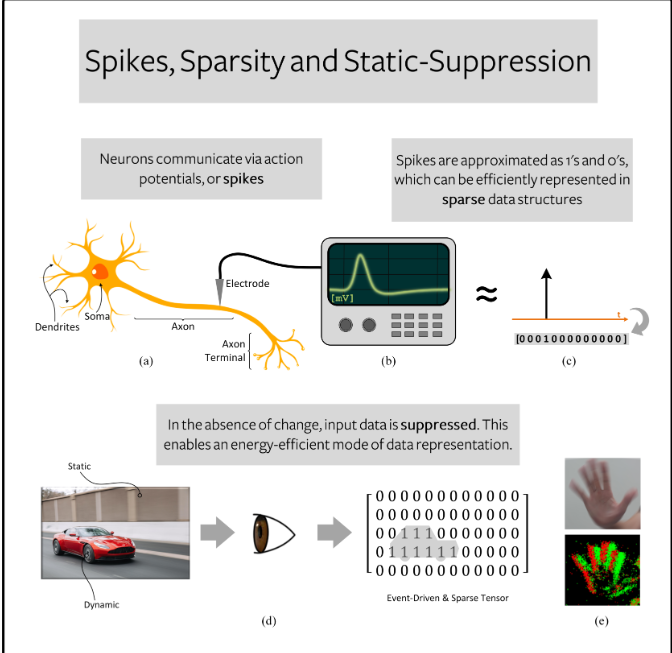


1. Spikes: neurons communicate via action potential or spike: (c) many computational models of neurons simplify this voltage burst to dicrete single bit event: a 1 or 0. this is simple to represent in hardware too.
2. Sparcity: (c) here we can see most of the neuron are at rest so activation is 0. sparse vevtors/ tensors are easy to store and easy for matrix multiplication with their synaptic weights. If most values are multiplied by ‘0’, then we don’t need to read many of the network parameters from memory. This means neuromorphic hardware can be extremely efficient.
3. Static suprresion/ event driven processing: Conventional signal processing requires all channels/pixels to adhere to a global sampling/shutter rate, which slows down how frequently sensing can take place. Event-driven processing now only contributes to sparsity and power-efficiency by blocking unchanging input, but it often allows for much faster processing speeds.

In [38]:
# setting up snntorch: pip install snntorch
import snntorch as snn
import torch

How does MNIST data looks like?  
  

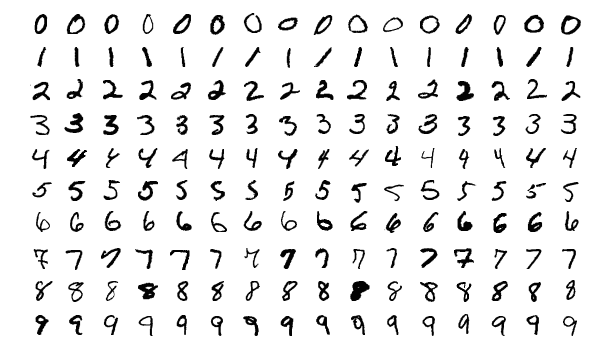

In [39]:
# training parameters:
batch_size= 128
data_path = '/tmp/data/mnist'
num_class = 10 # mnsit has 10 numbers, each represnt one class

dtype = torch.float # pytorch loves flaot-32

# pip install torchvision
from torchvision import datasets, transforms

transform = transforms.Compose([
    transforms.Resize((28, 28)), 
    transforms.Grayscale(), 
    transforms.ToTensor(), 
    transforms.Normalize((0,), (1,))]) # mean:0, std:1
mnist_train = datasets.MNIST(data_path, train=True, download=True, transform=transform)

from snntorch import utils
subset = 10

mnist_train = utils.data_subset(mnist_train, subset)
print("the size of the mnist train is : ", len(mnist_train))

from torch.utils.data import DataLoader
train_loader = DataLoader(mnist_train, batch_size=batch_size, shuffle=True)
train_loader

the size of the mnist train is :  6000


* Spike encoding:
1. Method-1: SNN are especially designed for time varying data and yet here mnist is not a time-varying data. Therefore we will pass the same training sample to the network each time step. This is like converting MNIST into a static, unchanging video.

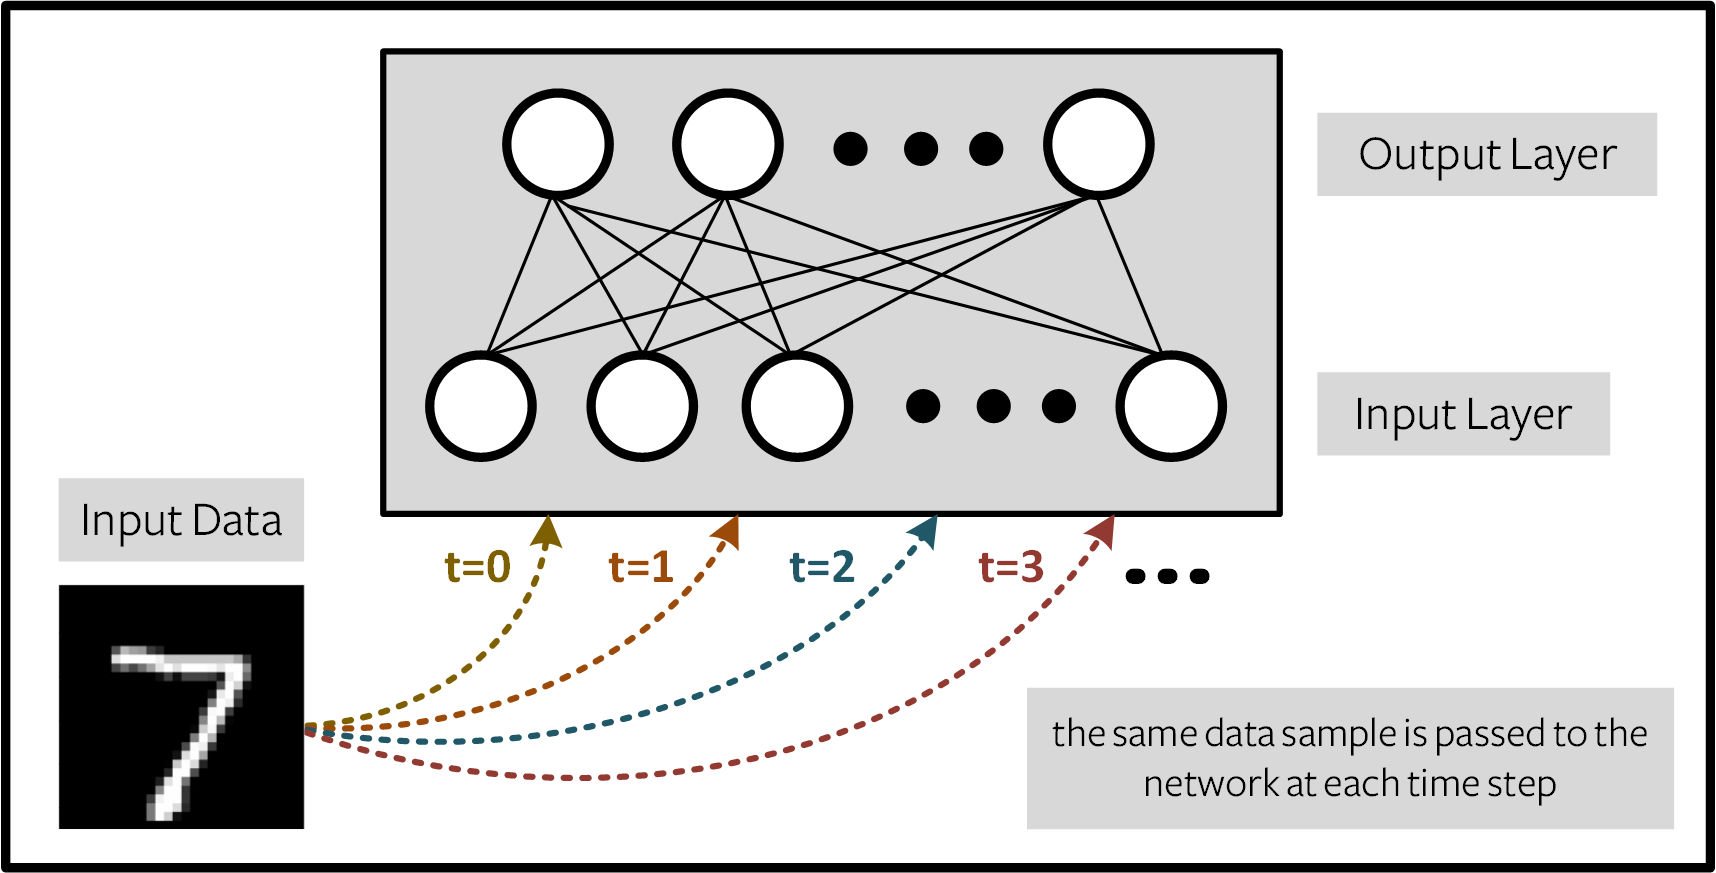


2. Method-2: Convert the input into a spike train of sequence length num_steps, where each feature/pixel takes on a discrete values either 0/1.In this case, MNIST is converted into a time-varying sequence of spikes that features a relation to the original image.

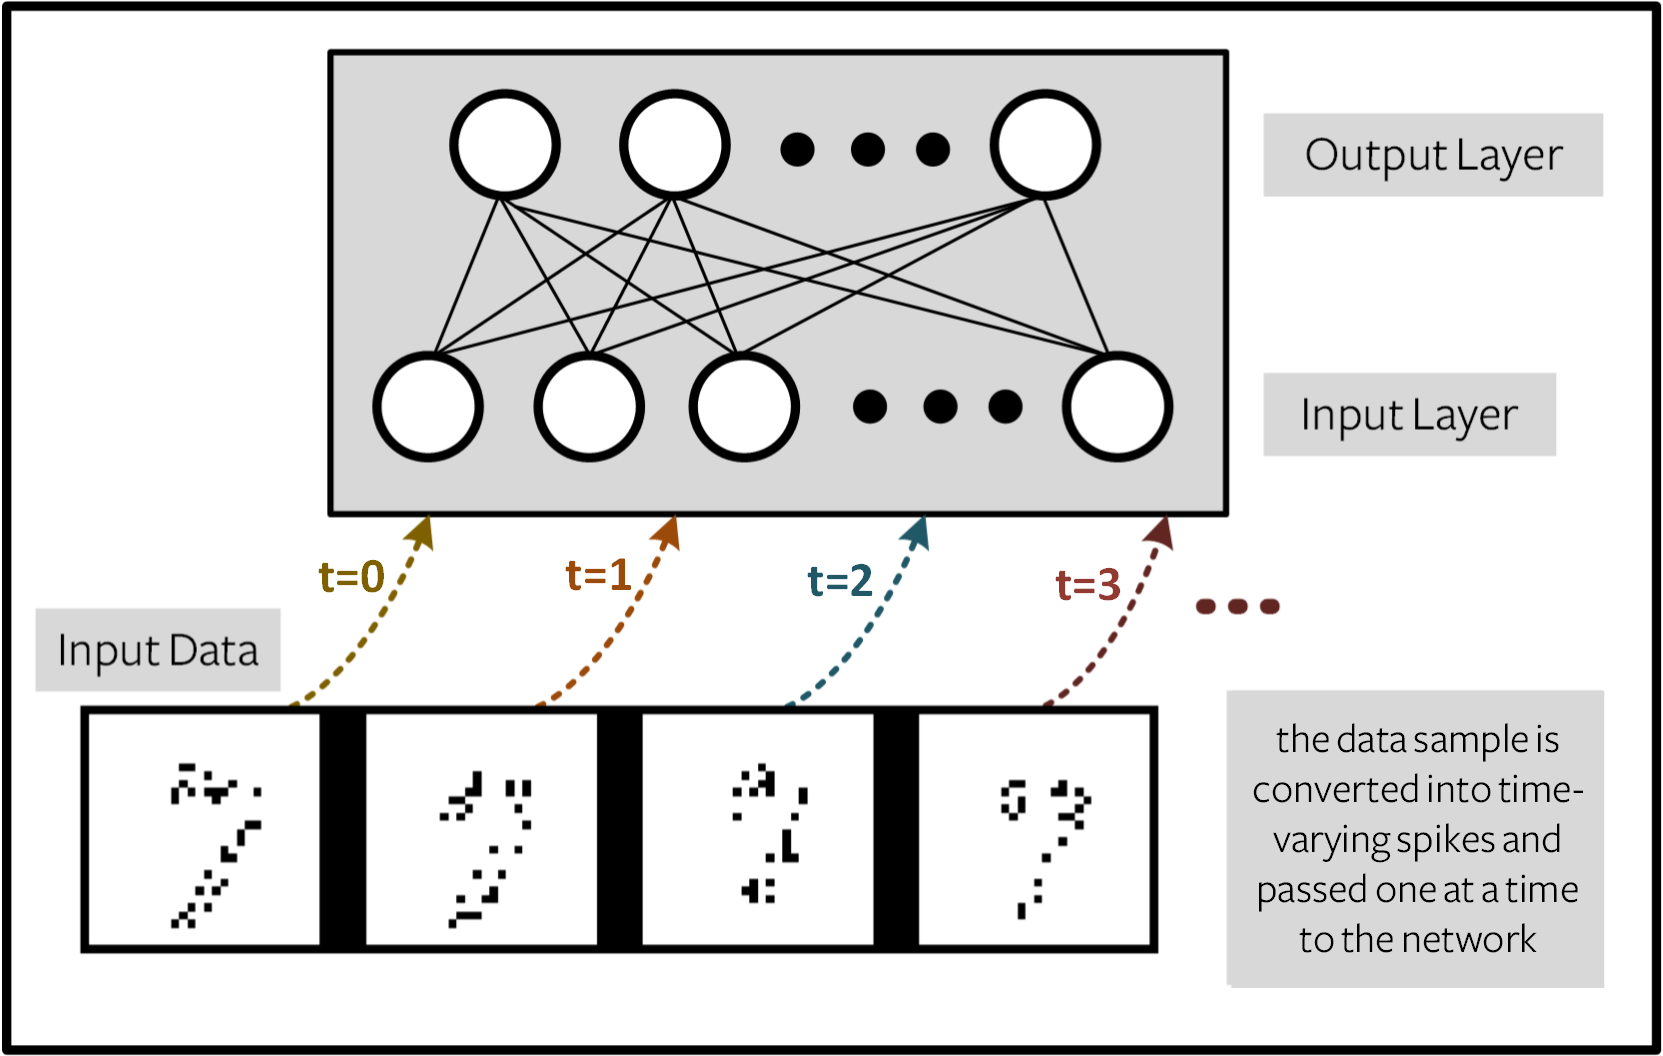

* The first method is quite straightforward, and does not fully exploit the temporal dynamics of SNNs. So let’s consider data-to-spike conversion (encoding) from (2) in more detail.
* snntorch.spikegen() module: conversion of data into spikes.
    1. spikegen.rate = Rate coding uses input features to determine spiking frequency
    2. spikegen.latency = Latency coding uses input features to determine spike timing
    3. spikegen.delta = Delta modulation uses the temporal change of input features to generate spikes

In [40]:
# Spike encoding: Rate encoding of simple MNIST:
num_steps = 10
raw_vector = torch.ones(num_steps) * 0.5
print("raw vector: ", raw_vector)

# bernouli's trial:
rate_coded_vector = torch.bernoulli(raw_vector)
print("rate coded vector: ", rate_coded_vector)

print(f"The output is spiking {rate_coded_vector.sum()*100/len(rate_coded_vector):.2f}% of the time.")

raw vector:  tensor([0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000,
        0.5000])
rate coded vector:  tensor([1., 1., 1., 1., 0., 1., 1., 0., 1., 0.])
The output is spiking 70.00% of the time.


In [41]:
# lets try with more number steps to encode input:
num_steps = 100
raw_vector = torch.ones(num_steps) * 0.5
rate_coded_vector = torch.bernoulli(raw_vector)
print(f"The output is spiking {rate_coded_vector.sum()*100/len(rate_coded_vector):.2f}% of the time.")

The output is spiking 50.00% of the time.


In [42]:
# lets try with more number steps to encode input:
num_steps = 1000
raw_vector = torch.ones(num_steps) * 0.5
rate_coded_vector = torch.bernoulli(raw_vector)
print(f"The output is spiking {rate_coded_vector.sum()*100/len(rate_coded_vector):.2f}% of the time.")

The output is spiking 49.00% of the time.


* Why Use Rate Encoding?  
Rate encoding simulates how biological neurons encode intensity:

* Brighter pixels spike more often.
* Darker pixels spike less often.
* Over multiple time steps, the spike rate approximates the pixel intensity.  

For an MNIST image, this probability of spiking corresponds to the pixel value. A white pixel corresponds to a 100% probability of spiking, and a black pixel will never generate a spike. Take a look at the ‘Rate Coding’ column below for further intuition.

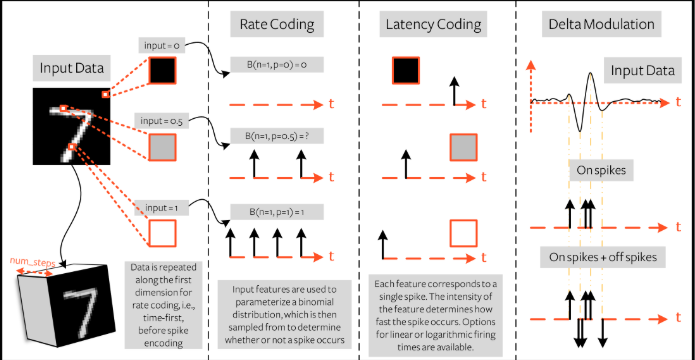

In [43]:
# Now lets use spikegen module and generate spike train

from snntorch import spikegen
data = iter(train_loader)
data_it, target_it = next(data)

spike_data = spikegen.rate(data_it, num_steps= 100)
spike_data.size() # num-steps * batch_size * input_dimension

torch.Size([100, 128, 1, 28, 28])

torch.Size([100, 28, 28])


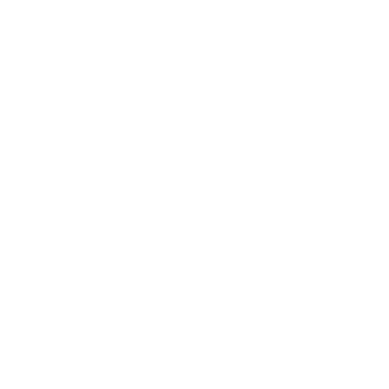

In [44]:
# lets visualize:
import matplotlib.pyplot as plt
import snntorch.spikeplot as splt
from IPython.display import HTML

# one smaple data out of the batch
spike_data_sample = spike_data[:, 0, 0]
print(spike_data_sample.size())

fig, ax = plt.subplots()
anim = splt.animator(spike_data_sample, fig, ax)
plt.rcParams["animation.ffmpeg_path"] = r"C:\ProgramData\chocolatey\bin\ffmpeg.exe"
HTML(anim.to_html5_video())

In [45]:
print(f"The corresponding target is: {target_it[0]}")

The corresponding target is: 0


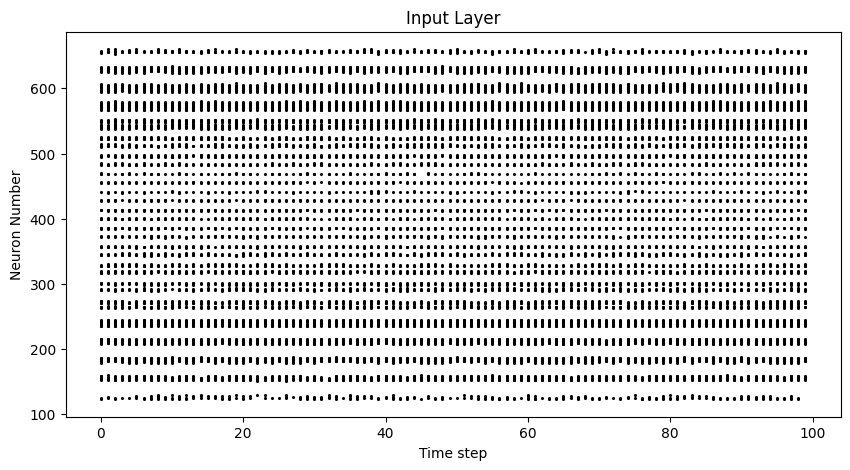

In [46]:
# raster plot:
num_steps =100
spike_data_sample2 = spike_data_sample.reshape((num_steps, -1))


fig = plt.figure(facecolor="w", figsize=(10, 5))
ax = fig.add_subplot(111)
splt.raster(spike_data_sample2, ax, s=1.5, c="black")

plt.title("Input Layer") 
plt.xlabel("Time step")
plt.ylabel("Neuron Number")
plt.show()

Observations  
Dense Spiking Regions:  
  
1. Some regions (like around neurons 400–500) have frequent spikes, meaning those neurons are highly active.
Other areas have sparse spikes, meaning those neurons fire less frequently.
Regular Patterns:

2. Some neurons seem to spike at regular intervals (e.g., evenly spaced dots).
Others show irregular activity, possibly due to different encoding or input stimuli.
Temporal Spiking Behavior:

3. This plot is useful for understanding how information flows in an SNN.
If this is rate encoding, more spikes mean a higher intensity of information.
If this is temporal encoding, the timing of spikes is crucial.

Dots vs. Vertical Lines  
Dots (Sparse Spiking):  

These represent neurons that spike occasionally.  
If a neuron fires only once in a while, its spikes appear as isolated dots on the raster plot.
Vertical Lines (High-Frequency Spiking):  

These represent neurons that spike at almost every time step.  
If a neuron is highly active and spikes in rapid succession (e.g., every time step or nearly every time step), the dots appear so close together that they form vertical lines.

#### Summary of Rate coding:  
Rate coding is like standing outside a cricket stadium where we cant see the game but we can hear the commentary. We can tell the game is happening
    * If the crowd is cheering a lot, you know something exciting is happening (high firing rate).
    * If the crowd is mostly quiet, the game is slow (low firing rate).
    * Even if some fans stay silent, you still get the general idea from the rest.
This is how rate coding works—more neuron spikes mean stronger signals, and fewer spikes mean weaker signals.

* Why Rate coding is not effiecient?
But imagine if every person in the stadium had to scream nonstop to send information—that would waste energy! ⚡ Similarly, if neurons rely only on rate coding, it would consume too much power.  
So, brain interprets brightness based on how fast neurons are firing. But if you relied only on rate coding, you’d need to stare at the light for a long time to "measure" how bright it is—not very efficient! ⚡

📌 Key Takeaways
1. Rate coding helps measure "how much" of something (brightness, loudness, pressure).
2. It's slow & energy-hungry, so your brain likely uses other methods too (like spike timing).
3. You don’t rely only on rate coding—for example, your brain instantly recognizes a familiar voice without needing "many spikes."

One important positive is: you may have heard of the Hebbian mantra of “neurons that fire together, wire together”. If there is plenty of spiking, this may suggest there is plenty of learning. In some cases where training SNNs proves to be challenging, encouraging more firing via a rate code is one possible solution.

#### Latency encoding:
  
* Unlike rate coding (which measures how often neurons fire), temporal coding focuses on when a neuron fires. The timing of a single spike carries a lot of meaning.

📌 Real-Life Example: Catching a Ball
Imagine you're playing catch with a friend. When they throw the ball:

If the ball is fast, your brain reacts instantly—you move your hand quickly.
If the ball is slow, your brain waits a bit longer before reacting.
Here, the timing of your reaction is like a spike in a neuron:

A fast-moving ball (strong input) = early spike (fires quickly)
A slow-moving ball (weak input) = late spike (fires later)
Your brain doesn’t need many spikes to know the ball is coming. One well-timed spike is enough!

Temporal (Latency) Coding (Time-Based) MNIST:  
🔹 Concept: A single spike is enough, and the timing of the spike represents pixel intensity.  
🔹 How it Works:  
  
Brighter pixels (higher intensity) → Fire earlier in the time window.  
Darker pixels (lower intensity) → Fire later in the time window.  
Black pixels (0 intensity) → Fire very late or not at all.  
🔹 Example (MNIST Pixel Values 0-255):  
  
Pixel Value 255 (white) → Neuron fires immediately at t=1           
Pixel Value 128 (gray) → Neuron fires at t=5  
Pixel Value 0 (black) → Neuron fires very late or never  

For rate coding comparision:
Pixel Value 255 (white) → Neuron fires a lot (high rate)  
Pixel Value 128 (gray) → Neuron fires sometimes (medium rate)  
Pixel Value 0 (black) → Neuron fires rarely or not at all  

  
Figure explaining latency/ temporal coding:
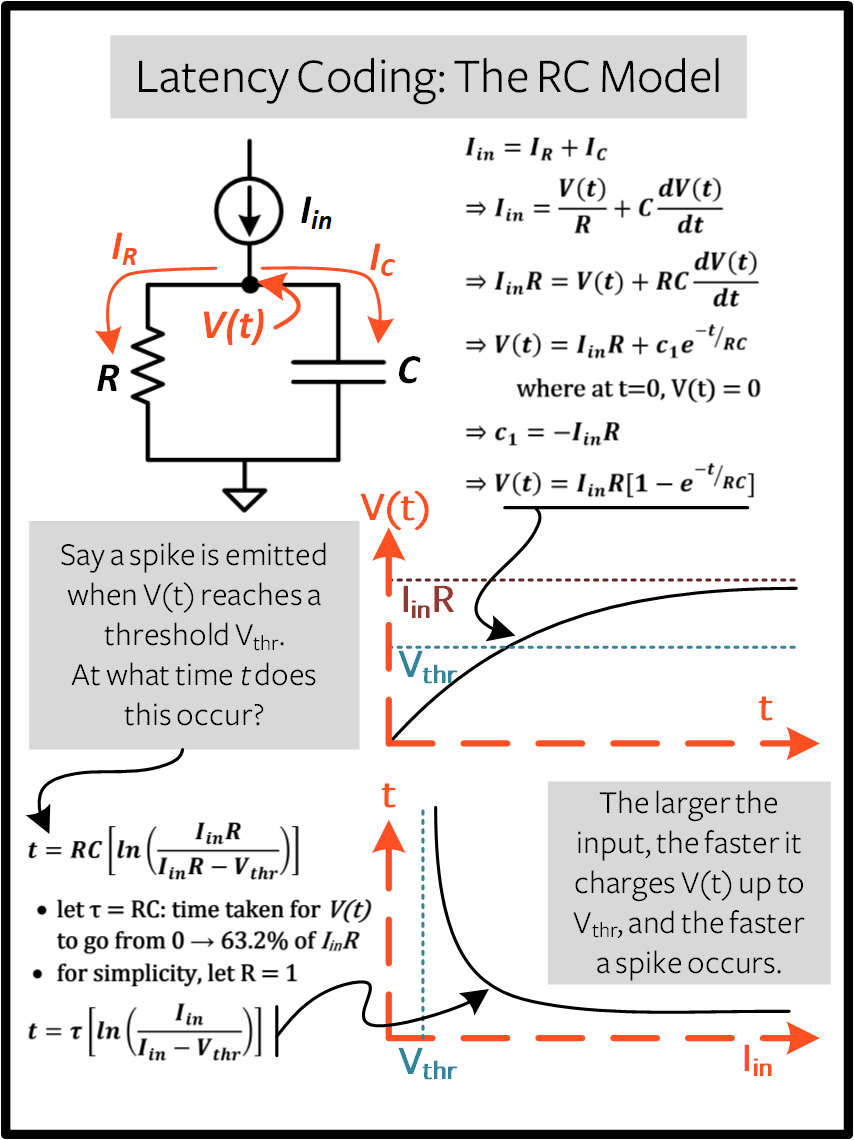

In [47]:
# lets code then!
def temporal_behaviour(input_data, tau_rc = 5, threshold = 0.1):
    spike_time = tau_rc * torch.log( input_data / (input_data - threshold))
    return spike_time

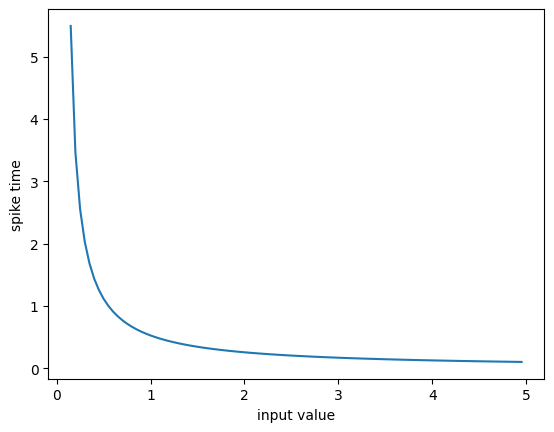

In [48]:
# lets visualize!
raw_input = torch.arange(0, 5, 0.05)
spike_times = temporal_behaviour(raw_input)

plt.plot(raw_input, spike_times)
plt.xlabel("input value")
plt.ylabel("spike time")
plt.show()

* obs: The smaller the value, the later the spike occurs with exponential dependence.


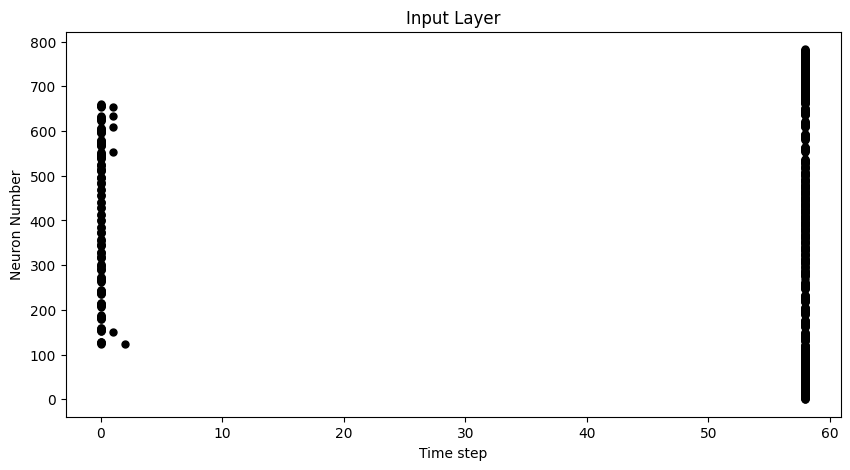

In [49]:
# lets apply spikegen.latency to our raw input:
spike_data = spikegen.latency(data_it, num_steps=100, tau=5, threshold=0.01)

fig = plt.figure(facecolor="w", figsize=(10, 5))
ax = fig.add_subplot(111)
splt.raster(spike_data[:, 0].view(num_steps, -1), ax, s=25, c="black")

plt.title("Input Layer")
plt.xlabel("Time step")
plt.ylabel("Neuron Number")
plt.show()

#print(data_it, target_it)
 

Intuition from the above figure:
* To make sense of the raster plot, note that high intensity features fire first, whereas low intensity features fire last:

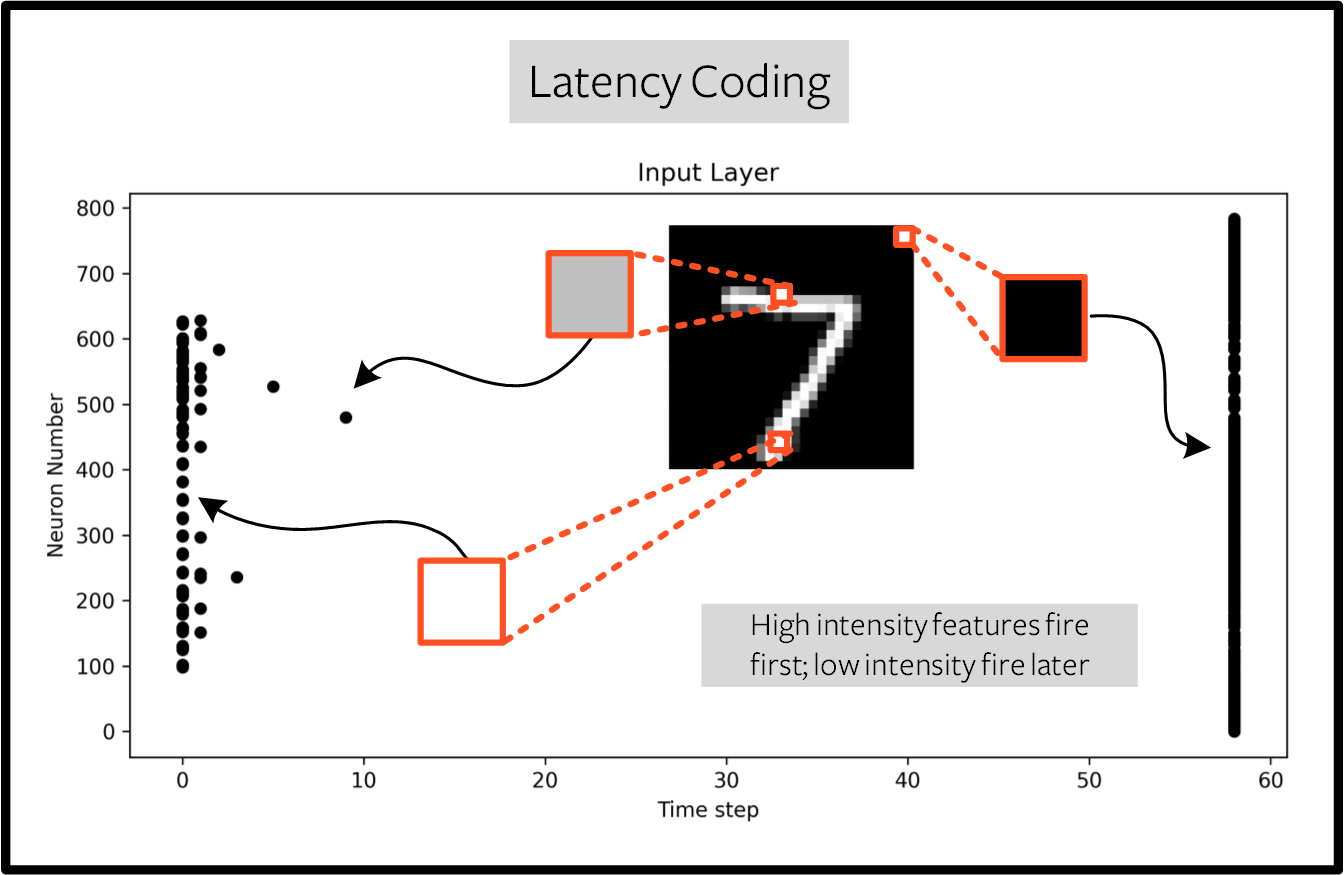

* The logarithmic code coupled with the lack of diverse input values (i.e., the lack of midtone/grayscale features) causes significant clustering in two areas of the plot. The bright pixels induce firing at the start of the run, and the dark pixels at the end. We can increase tau to slow down the spike times, or linearize the spike times by setting the optional argument linear = true

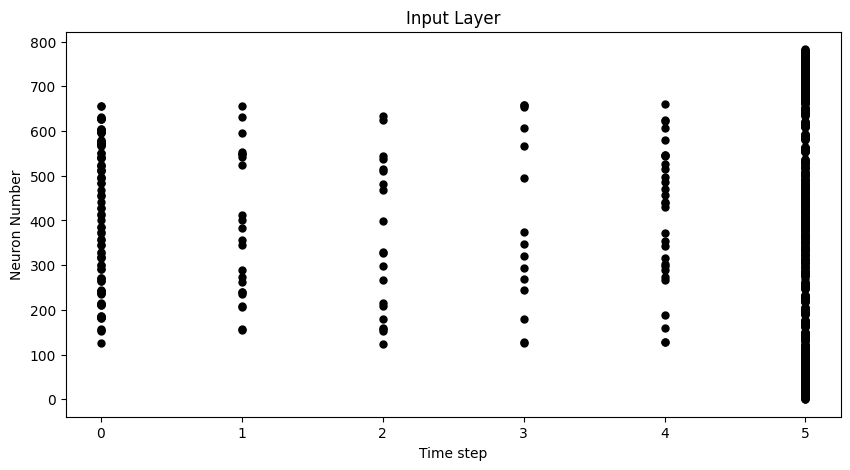

In [50]:
spike_data = spikegen.latency(data_it, num_steps=100, tau=5, threshold=0.01, linear=True)

fig = plt.figure(facecolor="w", figsize=(10, 5))
ax = fig.add_subplot(111)
splt.raster(spike_data[:, 0].view(num_steps, -1), ax, s=25, c="black")
plt.title("Input Layer")
plt.xlabel("Time step")
plt.ylabel("Neuron Number")
plt.show()

observation:
* The spread of firing times is much more evenly distributed now. This is achieved by linearizing the logarithmic equation 
* note how all firing occurs within the first ~5 time steps, whereas the simulation range is 100 time steps. This indicates there are many redundant time steps doing nothing. This can be solved by either increasing tau to slow down the time constant, or setting the optional argument normalize=True to span the full range of num_steps.

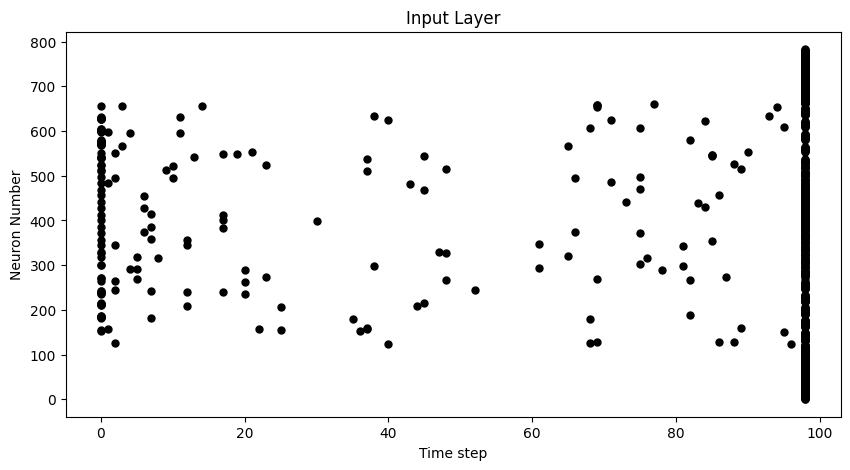

In [51]:
spike_data = spikegen.latency(data_it, num_steps=100, tau=5, threshold=0.01,
                              normalize=True, linear=True)

fig = plt.figure(facecolor="w", figsize=(10, 5))
ax = fig.add_subplot(111)
splt.raster(spike_data[:, 0].view(num_steps, -1), ax, s=25, c="black")

plt.title("Input Layer")
plt.xlabel("Time step")
plt.ylabel("Neuron Number")
plt.show()


* Major advantage of latency encoding over rate encoding is sparcity. If neurons are constrained to firing a maximum of once over the time course of interest, then this promotes low-power operation.

* there is one more thing: see the last concentrated neuron density tells us that those neurons couldnt cross threshold (dark background at last stage), we dont want that.

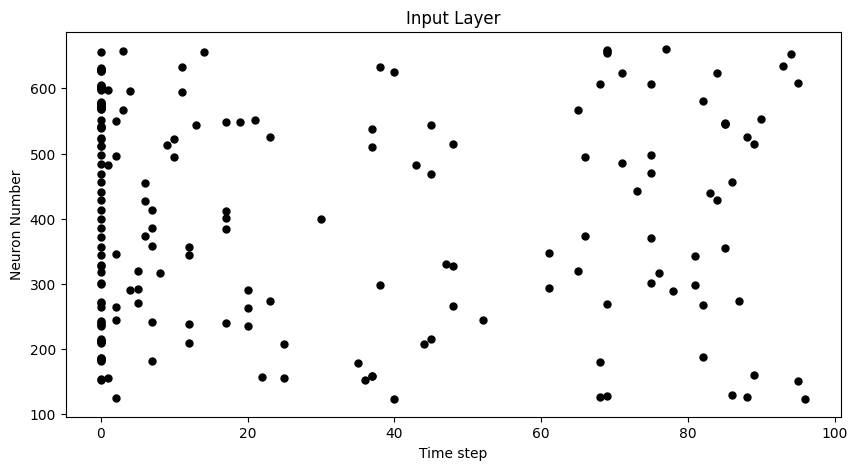

In [52]:
spike_data = spikegen.latency(data_it, num_steps=100, tau=5, threshold=0.01,
                              clip=True, normalize=True, linear=True)

fig = plt.figure(facecolor="w", figsize=(10, 5))
ax = fig.add_subplot(111)
splt.raster(spike_data[:, 0].view(num_steps, -1), ax, s=25, c="black")

plt.title("Input Layer")
plt.xlabel("Time step")
plt.ylabel("Neuron Number")
plt.show()

torch.Size([100, 28, 28])


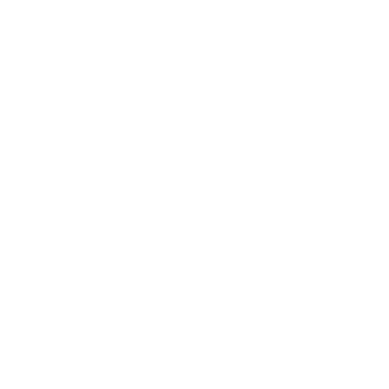

In [53]:
# now lets animate and visualize!
spike_data_sample = spike_data[:, 0, 0]
print(spike_data_sample.size())

fig, ax = plt.subplots()
anim = splt.animator(spike_data_sample, fig, ax)

HTML(anim.to_html5_video())

* a keen eye will be able to catch a glimpse of the initial frame where most of the spikes occur.

### Introducing Delta modulation
Now its time to integrate advantages of rate and temporal encoding to make an adaptive encoding model

* Concept of delta modulation:
Delta modulation is a form of analog-to-digital conversion where the difference (delta) between consecutive samples is encoded, rather than the absolute value. This technique is often used in signal processing and can be applied in Spiking Neural Networks (SNNs) to encode changes in input data.  

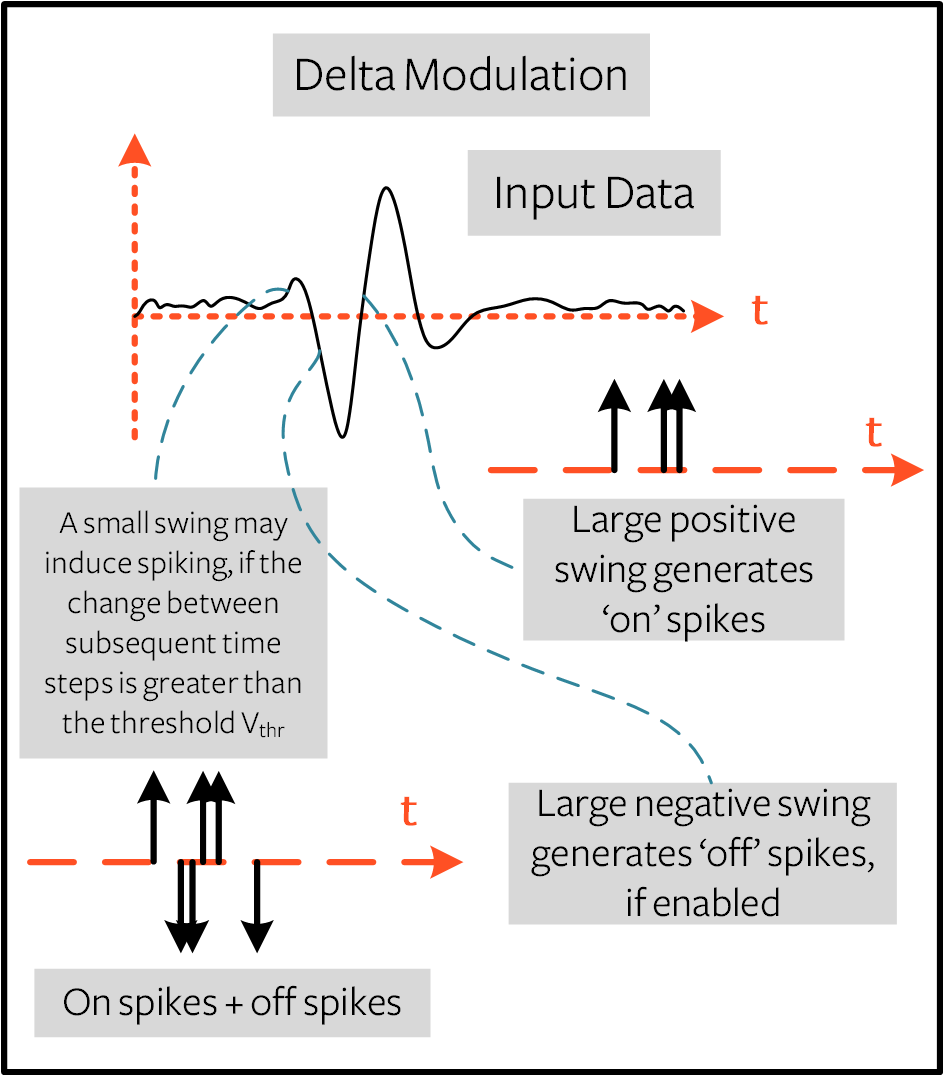
  
Here's an explanation with an example based on the content of the above image:  
  
Input Data: Consider a continuous input signal that varies over time. For simplicity, let's assume the input signal is a sine wave.  
  
Threshold (Vthr): A threshold value is set. If the change in the input signal between two consecutive time steps exceeds this threshold, a spike is generated.  

On Spikes and Off Spikes:  

On Spikes: If the input signal increases by more than the threshold, an "on" spike is generated.  

Off Spikes: If the input signal decreases by more than the threshold, an "off" spike is generated (if this feature is enabled).  


* final example to understand encoding: 

Rate encoding:    
The car is 100 meters away: The system might update once every second (low firing rate).  
The car is 10 meters away: The updates occur every millisecond (higher firing rate).  
The car is 1 meter away: The system might have to update continuously (even higher firing rate) to capture the rapid changes in the car's position.  

Latency encoding:  
The car is 100 meters away: The spike happens every 5 seconds (longer delay between spikes).  
The car is 10 meters away: The spike happens every 1 second (shorter delay between spikes).  
The car is 1 meter away: The spike could happen almost continuously (extremely short delay between spikes).  

delta modulation:  
The car is 100 meters away: The system might only record a small change, like -1 meter every second.  
The car is 10 meters away: The system might record a -2 meters change every second.    
The car is 1 meter away: The system might need to record changes of -5 meters every second to track rapid movement.  



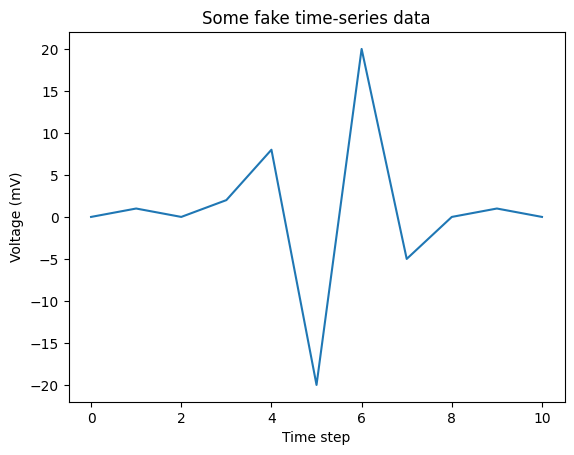

In [54]:
# Create a tensor with some fake time-series data
data = torch.Tensor([0, 1, 0, 2, 8, -20, 20, -5, 0, 1, 0])

# Plot the tensor
plt.plot(data)

plt.title("Some fake time-series data")
plt.xlabel("Time step")
plt.ylabel("Voltage (mV)")
plt.show()


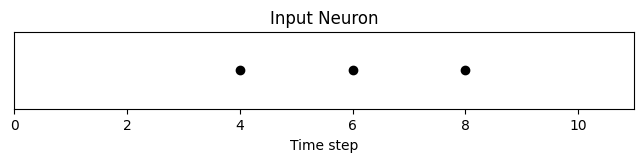

In [55]:
# Convert data
spike_data = spikegen.delta(data, threshold=4)
#spike_data = spikegen.delta(data, threshold=4, off_spike=True)

# Create fig, ax
fig = plt.figure(facecolor="w", figsize=(8, 1))
ax = fig.add_subplot(111)

# Raster plot of delta converted data
splt.raster(spike_data, ax, c="black")

plt.title("Input Neuron")
plt.xlabel("Time step")
plt.yticks([])
plt.xlim(0, len(data))
plt.show()

* There are three time steps where the difference between data(t) and data(t+1) is greater than or equal to thresold =4. This means there are three on-spikes. 
* similarly there will be offspieks as well

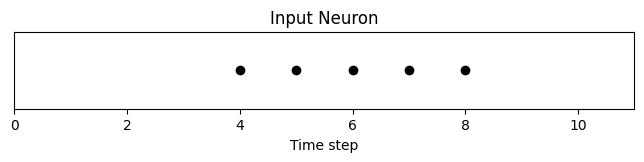

In [56]:
# Convert data
#spike_data = spikegen.delta(data, threshold=4)
spike_data = spikegen.delta(data, threshold=4, off_spike=True)

# Create fig, ax
fig = plt.figure(facecolor="w", figsize=(8, 1))
ax = fig.add_subplot(111)

# Raster plot of delta converted data
splt.raster(spike_data, ax, c="black")

plt.title("Input Neuron")
plt.xlabel("Time step")
plt.yticks([])
plt.xlim(0, len(data))
plt.show()

# Chapter-6: Collection of Neurons:

Ok, now instead of having one neuron, we will see how to represent signal with multiple connected neurons! This is where the magic happens, and we can start to see how a neural network can be built.

In [57]:
# Lets define our LIF class again! adding one reset method to make everything null.

class FirstOrderLIF:
    def __init__(self, tau_rc = 0.2, tau_ref = 0.002, v_init = 0, v_th = 1.0):
        self.tau_rc = tau_rc
        self.v = v_init
        self.v_th = v_th
        self.tau_ref = tau_ref
        self.output = 0
        self.refractory_time = 0

    def step(self, I, t_step):
        self.refractory_time -= t_step

        if self.refractory_time <= 0:
            self.v = self.v * (1 - t_step / self.tau_rc) + I * t_step / self.tau_rc

        # now output:
        if self.v >= self.v_th:
            self.refractory_time = self.tau_ref
            self.output = 1/ t_step
            self.v = 0
        else:
            self.output = 0
        return self.output
    def reset(self):
        self.v = self.output = self.refractory_time = 0

# now our synpase class: with reset() method

class FirstOrderSynapse:
    def __init__(self, tau_s= 0.01):
        self.tau_s = tau_s
        self.output = 0

    def step(self, ip_v, t_step):
        # decay syanpse mathematical model:
        self.output = self.output * (1 - t_step / self.tau_s) + ip_v * t_step / self.tau_s
        return self.output
    def reset(self):
        self.output = 0

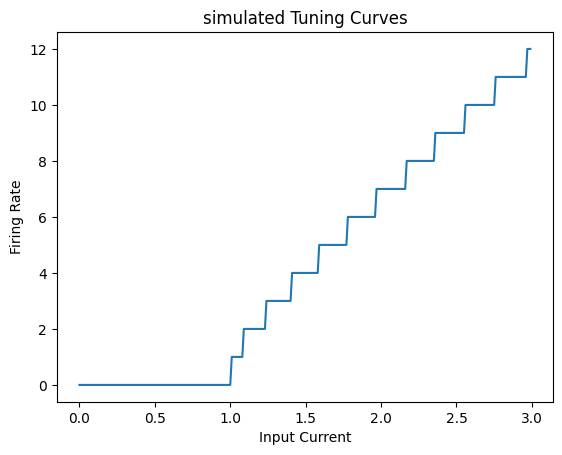

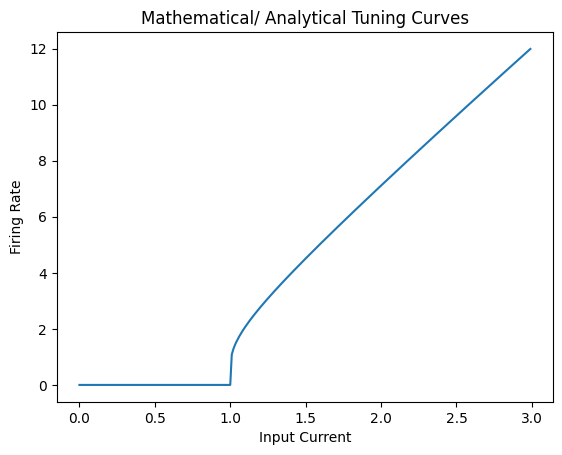

In [58]:
# Tuning curve or rate of spiking of LIF neuron:
np.random.seed(0)

def computeTuningCurve(lif, inputs, time_limit = 1, t_step = 0.001):
    tuningCurve = []
    for inp in inputs:
        spike_count = 0
        lif.reset()
        for _ in np.arange(0, time_limit, t_step):
            output = lif.step(inp, t_step)
            if output > 0:
                spike_count += 1
        rate = spike_count / time_limit
        tuningCurve.append(rate)
    lif.reset()

    return tuningCurve

def analyticalRate(neuron, I):
    if I <= neuron.v_th: return 0
    else:                return 1 / (neuron.tau_ref - neuron.tau_rc * np.log(1 - neuron.v_th/I))

neuron = FirstOrderLIF()

inputs                  = np.arange(0, 3, 0.01)
tuningCurve_simulation  = computeTuningCurve(neuron, inputs)
tuningCurve_analytical  = [analyticalRate(neuron, i) for i in inputs]

plt.figure()
plt.plot(inputs, tuningCurve_simulation)
plt.xlabel('Input Current')
plt.ylabel('Firing Rate')
plt.title('simulated Tuning Curves')
plt.show()

plt.figure()
plt.plot(inputs, tuningCurve_analytical)
plt.xlabel('Input Current')
plt.ylabel('Firing Rate')
plt.title('Mathematical/ Analytical Tuning Curves')
plt.show()

the decoder is 0.3229210069532396


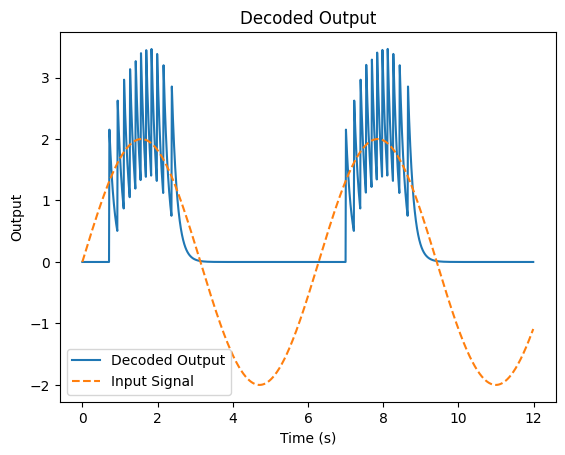

In [59]:
# instantiate an obj of synpase:
neuron = FirstOrderLIF()
psp    = FirstOrderSynapse(tau_s= 0.15)

def compute_decoder(neuron, range_low=-2, range_high=2, interval=0.1):
    numerator   = 0
    denominator = 0
    for i in np.arange(range_low, range_high, interval):
        r = AnalyticalRate(neuron, i)
        numerator   += r * i
        denominator += r * r
    return numerator / denominator

t_step  = 0.01
t       = np.arange(0, 12, t_step)
decoder = compute_decoder(neuron, -2, 2)

print(f"the decoder is {decoder}")

signal_out     = []
decoded_output = []

for i in t:
    sig = sine_wave(i)
    neuron.step(sig, t_step)
    signal_out.append(sig)
    psp.step(neuron.output, t_step)
    decoded_output.append(decoder * psp.output)

# plot:
plt.figure()
plt.plot(t, decoded_output)
plt.plot(t, signal_out, linestyle="--")
plt.xlabel('Time (s)')
plt.ylabel('Output')
plt.title('Decoded Output')
plt.legend(['Decoded Output', 'Input Signal'])
plt.show()

Observation:  
* So far, we have focused on single neurons but in order to convey information effectively, we need populations of neurons—not just one. 
* In other words, we are going to move from using one neuron to using many neurons to better represent (and later on, process) our signals. 
* If we work with a population of neurons, each neuron should react differently to the same input (meaning they should have different tuning curves).
* If two neurons had the exact same tuning curve, they aren’t conveying any more information than one neuron. This should convey more information than just one neuron, which we can verify by decoding the signals of multiple neurons.

Now that we’re working with multiple neurons, we will also start using the subscript to represent neuron. We’ll also add three additional terms to scale the input of every neuron:  

1. Gain (alpha):
    * scaling factor: different for each neuron
    * this multiplicative factor ensures differnt neurons have different sensitivity to input, they responds to different levels to the same input.
2. Encoder (e):
    * A directional factor that determines whether neuron respond to +ve or -ve inputs.
    * Typically e += 1 means, neuron fires more for positive inputs, while e -= 1 means neuron fires more for negative inputs.
    * In population coding, different neurons have different encoder values, so they respond to full range of same input signal.
3. Bias(b):
    * An offset that shifts neuron's activation threshold.
    * This ensures some neuron will fire even when input is low, enabling a dynamic range of responses.

Updated input equation => J(i) = a(i).e(i).I + b(i)

Basically our aim is to observe how the population of neurons respond to each input and appriciate the input according to their properties.

Gain and bias derived from rate of firing of neuron:  
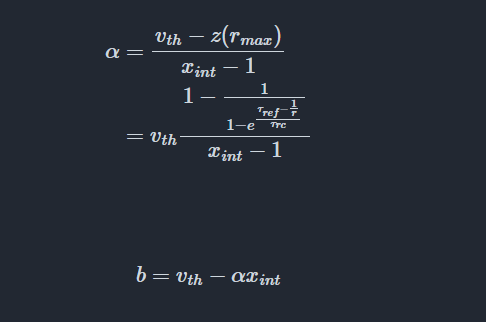

* alpha scaling the input I based on maximum firing rate and tau_rc of the neuron.
* This exponential component models the non linerty firing rate relationship.
* bias (b) ensures neuron to fire at certain starting threshold.

In [60]:
# implementing gain and bias:
def GetGainBias(MaxRate, intercept, tau_rc, tau_ref, v_th):
    gain = v_th * (1 - 1 / (1 - np.exp((tau_ref - 1/MaxRate) / tau_rc))) / (intercept - 1)
    bias = v_th - gain * intercept
    return gain, bias

In [61]:
## LIF collection neurons:
class FirstOrderLIFCollection:
    def __init__(self, num_neurons, tau_rc = 0.02, tau_ref = 0.002, v_th =1, max_rate_change = (200,400), intercept_range = (-1, 1), encoder_options = (-1, 1)):
        self.neurons  = []
        self.gains    = []
        self.biases   = []
        self.encoders = []

        for i in range(num_neurons):
            neuron    = FirstOrderLIF(tau_rc= tau_rc, tau_ref = tau_ref, v_th= v_th)
            max_rate  = np.random.uniform(max_rate_change[0], max_rate_change[1])
            intercept = np.random.uniform(intercept_range[0], intercept_range[1])
            encoder   = np.random.choice(encoder_options)

            gain, bias = GetGainBias(max_rate, intercept,tau_rc, tau_ref, v_th)

            self.neurons.append(neuron)
            self.gains.append(gain)
            self.biases.append(bias)
            self.encoders.append(encoder)

    def step(self, I, t_step):
        outputs = []
        for neuron, gain, bias, encoder in zip(self.neurons, self.gains, self.biases, self.encoders):
            output = neuron.step(I * gain * encoder + bias, t_step)
            outputs.append(output)
        return outputs
    
    def reset(self):
        for neuron in self.neurons:
            neuron.reset()
